## Packages and definition of parameters

In [1]:
# --- packages --- #
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os, sys, glob
import matplotlib.colors as colors

from ctapipe.instrument import SubarrayDescription

# --- path to all scripts --- #
sys.path.insert(0, '/fefs/aswg/workspace/juan.jimenez/stereo_analysis/scripts')
import auxiliar as aux
import geometry as geom
# graphic parameters
aux.params()

# --- LaPalma map importing --- #
# reading map images
mapZoom  = plt.imread('/fefs/aswg/workspace/juan.jimenez/stereo_analysis/config_files/images/map1.png')
mapNZoom = plt.imread('/fefs/aswg/workspace/juan.jimenez/stereo_analysis/config_files/images/map2.png')
# north arrow sizes 
xa, ya, arrow_length = 0.95, 0.14, 0.05

# --- paths --- #
event_coinc_dir   = '/fefs/aswg/workspace/juan.jimenez/data/dl1/joint_runs_magic_lst'
dir_stereo_reco   = '/fefs/aswg/workspace/juan.jimenez/data/datasets/'
name_stereo_3T    = 'stereo_data_3T'
name_stereo_total = 'stereo_data_total'
dl1_example_file  = '/fefs/aswg/workspace/juan.jimenez/data/dl1/stereo_subruns/Run02923/dl1_stereo_LST-1_MAGIC.Run02923.0038.h5'

# text for labeling telescopes
tel_lab = ['LST-1', 'MAGIC-1', 'MAGIC-2'] 
lst_diameter   = 23 # m
magic_diameter = 17 # m

In [2]:
# --- reading the data --- #
df    = pd.read_hdf(os.path.join(dir_stereo_reco, f'{name_stereo_total}.h5'))
df_3T = pd.read_hdf(os.path.join(dir_stereo_reco, f'{name_stereo_3T   }.h5'))

###########################################
# --- telescopes positions extraction --- #
###########################################

tel_positions = SubarrayDescription.from_hdf(dl1_example_file).positions

coord_t1, coord_t2, coord_t3 = [tel_positions[tel_index].value for tel_index in [1, 2, 3]]

xpos = np.array([tel_positions[i].value[0] for i in [1, 2, 3]])
ypos = np.array([tel_positions[i].value[1] for i in [1, 2, 3]])
zpos = np.array([tel_positions[i].value[2] for i in [1, 2, 3]])

# applying a 90 degree rotation to set the north in the y direction
xpos, ypos = ypos, xpos
xpos = xpos * (-1)

print(f'\nExtracting telescopes positions:')
print(f'LST-1   coords:  [{xpos[0]:.2f}, {ypos[0]:.2f}, {zpos[0]:.2f}] m')
print(f'MAGIC-1 coords:  [{xpos[1]:.2f}, {ypos[1]:.2f}, {zpos[1]:.2f}] m')
print(f'MAGIC-2 coords:  [{xpos[2]:.2f}, {ypos[2]:.2f}, {zpos[2]:.2f}] m')

###########################################

print(f'Stereo total dataframe:')
display(df.head(5))
print(f'3-Tel dataframe:')
display(df_3T.head(5))


Extracting telescopes positions:
LST-1   coords:  [-77.13, -8.09, 0.78] m
MAGIC-1 coords:  [62.55, 39.30, -0.97] m
MAGIC-2 coords:  [14.57, -31.21, 0.20] m
Stereo total dataframe:


obs_id_magic  event_id_magic  obs_id_lst  \
obs_id event_id tel_id                                             
2923   2054766  1            5093174            2132      2923.0   
                2            5093174            2132      2923.0   
                3            5093174            2132      2923.0   
       2054879  1            5093174            2134      2923.0   
                2            5093174            2134      2923.0   

                        event_id_lst    intensity         x         y  \
obs_id event_id tel_id                                                  
2923   2054766  1          2054766.0  1539.117331  0.159153 -0.199730   
                2          2054766.0   682.101041  0.219247 -0.123636   
                3          2054766.0   830.125000  0.211807 -0.165825   
       2054879  1          2054879.0   222.561295 -0.455197  0.046522   
                2          2054879.0   185.757812  0.322648  0.192534   

                               r         phi    length  length_uncertainty  \
obs_id event_id tel_id                                                       
2923   2054766  1       0.255385  -51.450648  0.095864            0.003028   
                2       0.251705  -29.419061  0.100258            0.002468   
                3       0.268999  -38.057629  0.094508            0.003121   
       2054879  1       0.457568  174.164535  0.041649            0.003202   
                2       0.375727   30.825800  0.036762            0.001455   

                           width  width_uncertainty        psi  skewness  \
obs_id event_id tel_id                                                     
2923   2054766  1       0.041476           0.001832  39.938156 -0.450708   
                2       0.039357           0.001128  65.294646 -0.720628   
                3       0.030039           0.000740  80.270400  0.379087   
       2054879  1       0.032359           0.001995 -78.978052 -0.425175   
                2       0.028710           0.001415  24.925432  0.411584   

                        kurtosis     slope  intercept  intensity_width_1  \
obs_id event_id tel_id                                                     
2923   2054766  1       2.467139 -7.488149  19.800128                0.0   
                2       2.653032  7.173953  15.740397                0.0   
                3       4.620778 -5.738219  18.871566                0.0   
       2054879  1       2.256291 -2.457408  15.740922                0.0   
                2       2.163804  3.734823  12.596438                0.0   

                        intensity_width_2  pixels_width_1  pixels_width_2  \
obs_id event_id tel_id                                                      
2923   2054766  1                0.000000             0.0        0.000000   
                2                0.000000             0.0        0.000000   
                3                0.000000             0.0        0.000000   
       2054879  1                0.000000             0.0        0.000000   
                2                0.022543             0.0        0.000962   

                        n_pixels  n_islands  pointing_alt  pointing_az  \
obs_id event_id tel_id                                                   
2923   2054766  1             42          1      0.784340     1.508031   
                2             61          1      0.784258     1.508029   
                3             46          2      0.784235     1.508001   
       2054879  1             10          1      0.784341     1.508032   
                2             19          1      0.784258     1.508029   

                           timestamp  time_diff  multiplicity  combo_type  \
obs_id event_id tel_id                                                      
2923   2054766  1       1.605743e+09   0.000020             3           3   
                2       1.605743e+09   0.002003             3           3   
                3       1.605743e+09   0.002003        

3-Tel dataframe:


combo_type  multiplicity     timestamp  pointing_alt  \
obs_id event_id                                                         
2923   2054766            3             3  1.605743e+09      0.784278   
       2054879            3             3  1.605743e+09      0.784278   
       2054932            3             3  1.605743e+09      0.784279   
       2055078            3             3  1.605743e+09      0.784279   
       2055274            3             3  1.605743e+09      0.784281   

                 pointing_az  reco_energy   reco_alt    reco_az  gammaness  \
obs_id event_id                                                              
2923   2054766      1.508020     1.073560  45.808426  86.622282   0.229856   
       2054879      1.508021     0.304828  44.365858  86.053244   0.005571   
       2054932      1.508021     0.308370  43.797085  85.651368   0.575596   
       2055078      1.508021     6.024152  44.133521  89.574563   0.010758   
       2055274      1.508022     2.305442  43.991970  87.230756   0.217573   

                 pointing_ra  pointing_dec    reco_ra   reco_dec  theta2_on  \
obs_id event_id                                                               
2923   2054766     83.966939     22.246320  83.020361  22.381911   0.457941   
       2054879     83.966939     22.246321  84.636853  22.297141   0.944449   
       2054932     83.966939     22.246322  85.319784  22.385995   2.577053   
       2055078     83.966940     22.246323  83.945537  19.847722   4.774763   
       2055274     83.966940     22.246324  84.715779  21.376468   1.417173   

                 theta2_off      total_id  
obs_id event_id                            
2923   2054766     1.416898  2923.2054766  
       2054879     0.127986  2923.2054879  
       2054932     0.890579  2923.2054932  
       2055078     7.036542  2923.2055078  
       2055274     1.362165  2923.2055274

## Defining the variables

In [3]:
# reading by combo type (i.e. telescope pairs)
c0 = pd.read_hdf(os.path.join(dir_stereo_reco, f'stereo_data_total0.h5')).query(f'tel_id == 2')
c1 = pd.read_hdf(os.path.join(dir_stereo_reco, f'stereo_data_total1.h5')).query(f'tel_id == 1')
c2 = pd.read_hdf(os.path.join(dir_stereo_reco, f'stereo_data_total2.h5')).query(f'tel_id == 1')
c3 = df.query(  f'combo_type == 3', inplace=False).query(f'tel_id == 1')
c3_2 = df.query(f'combo_type == 3', inplace=False).query(f'tel_id == 2')
c3_3 = df.query(f'combo_type == 3', inplace=False).query(f'tel_id == 3')

# filtering the data by gammaness
g50 = c3.query(f'gammaness > {0.50}', inplace=False)
g70 = c3.query(f'gammaness > {0.70}', inplace=False)
g80 = c3.query(f'gammaness > {0.80}', inplace=False)
g90 = c3.query(f'gammaness > {0.90}', inplace=False)
g99 = c3.query(f'gammaness > {0.99}', inplace=False)

# filtering data by disp_diff_mean
diff10 = c3.query(f'disp_diff_mean < {np.sqrt(0.10)}', inplace=False)
diff50 = c3.query(f'disp_diff_mean < {np.sqrt(0.05)}', inplace=False)
diff01 = c3.query(f'disp_diff_mean < {np.sqrt(0.01)}', inplace=False)



# --- extracting variables from dataframes --- #
# for telescopes
xc0, yc0 = c0['core_y'] * (-1), c0['core_x']
xc1, yc1 = c1['core_y'] * (-1), c1['core_x']
xc2, yc2 = c2['core_y'] * (-1), c2['core_x']
xc3, yc3 = c3['core_y'] * (-1), c3['core_x']
# for gammaness
xg50, yg50 = g50['core_x'], g50['core_y']
xg70, yg70 = g70['core_x'], g70['core_y']
xg80, yg80 = g80['core_x'], g80['core_y']
xg90, yg90 = g90['core_x'], g90['core_y']
xg99, yg99 = g99['core_x'], g99['core_y']

# filtering data with gammaness, disp_diff_mean and intensity
dquality = c3[20000:65000]

# len(dquality)
# for multiple filters
xq, yq = dquality['core_x'], dquality['core_y']
# extracting energy
eq = dquality['reco_energy']
# extracting gammaness
gq = dquality['gammaness']
# extracting impact parameter
iq1 = dquality['impact']
iq2 = c3_2[20000:65000]['impact']
iq3 = c3_3[20000:65000]['impact']
# extracting impact parameter
hq = dquality['h_max']

In [4]:
#######################################
# --- some filtering on variables --- #
#######################################
# filtering by h_max
h_lim = 6300
h_low = c3.query(f'h_max <= {h_lim}', inplace=False)
h_up  = c3.query(f'h_max >  {h_lim}', inplace=False)

# filtering by slope
slope_lim = 7
slope_low = c3.query(f'slope <= {slope_lim} & slope >= {-slope_lim}', inplace=False)
slope_up  = c3.query(f'slope >  {slope_lim} or slope < {-slope_lim}', inplace=False)

# filtering by gammanesss
g_lim1 = 0.2
g_lim2 = 0.7
gamma_low = c3.query(f'gammaness < {g_lim1}',                          inplace=False)
gamma_mid = c3.query(f'gammaness <= {g_lim2} & gammaness >= {g_lim1}', inplace=False)
gamma_up  = c3.query(f'gammaness > {g_lim2}',                          inplace=False)

# filtering by gamma var
gv_lim = 0.12
gv_low = c3.query(f'gammaness_var <= {gv_lim}', inplace=False)
gv_up  = c3.query(f'gammaness_var >  {gv_lim}', inplace=False)

# filtering by intensity
i_lim = 1000
i_low = c3.query(f'intensity <= {i_lim}', inplace=False)
i_up  = c3.query(f'intensity >  {i_lim}', inplace=False)

# # filtering by energy
e_lim1 = 5e-2
e_lim2 = 2
e_low = c3.query(f'reco_energy <  {e_lim1}',                           inplace=False)
e_mid = c3.query(f'reco_energy <= {e_lim2} & reco_energy >= {e_lim1}', inplace=False)
e_up  = c3.query(f'reco_energy >  {e_lim2}',                           inplace=False)

# filtering by energy var
ev_lim = 0.45
ev_low = c3.query(f'reco_energy_var <= {ev_lim}', inplace=False)
ev_up  = c3.query(f'reco_energy_var >  {ev_lim}', inplace=False)

# filtering by disp diff
d_lim = np.sqrt(0.05)
d_low = c3.query(f'disp_diff_mean <= {d_lim}', inplace=False)
d_up  = c3.query(f'disp_diff_mean >  {d_lim}', inplace=False)

# filtering by lenght
len_lim = 0.05
len_low = c3.query(f'length <= {len_lim}', inplace=False)
len_up  = c3.query(f'length >  {len_lim}', inplace=False)

# filtering by width
wi_lim = 0.03
wi_low = c3.query(f'width <= {wi_lim}', inplace=False)
wi_up  = c3.query(f'width >  {wi_lim}', inplace=False)
#######################################

### Plotting on a map

In [5]:
# -- image fitting limits [m] for the maps --- #
xlim  = (110, -110)
ylim  = (-90,   90)
xlim2 = (250, -230)
ylim2 = (-147, 204)


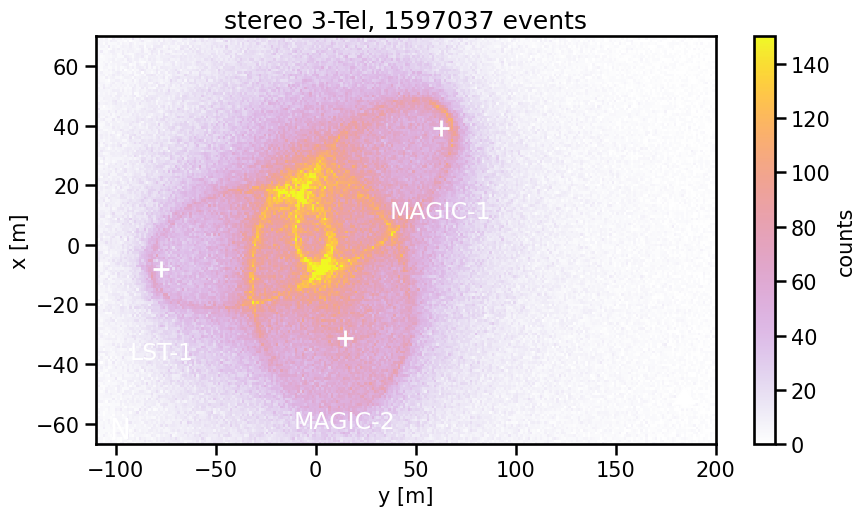

In [14]:
fig, ax = plt.subplots(figsize=(10,5.3))
ax.set_title(f'stereo 3-Tel, {len(yc3)} events')

xlimN2 = (-110, 200)
ylimN2 = (-67, 100)

for i in range(len(xpos)):
    ax.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

# ax.imshow(mapZoom, extent=[*xlimN2, *ylimN2], aspect='auto', alpha=1)
    
ncolors = 256
color_array = plt.get_cmap('plasma')(range(ncolors))
color_array[:,-1] = np.linspace(0, 1.0, ncolors)
cmap = colors.LinearSegmentedColormap.from_list(name='cmap',colors=color_array)

# fig.colorbar(im, label='counts', ax=ax, cmap=map_object)
# north arrow
ax.annotate('',  xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', arrowprops=dict(facecolor='w', 
            width=5, headwidth=15, ec='w'), ha='center', va='center', fontsize=20, xycoords=ax.transAxes)
ax.text(-98, -62, 'N', color='w', ha='center', va='center', fontsize=20)


_, _, _, im = ax.hist2d(-1*yc3, xc3, bins=400, cmap=cmap, range=(np.flip(xlim2), ylim2), vmin=0, vmax=150)
fig.colorbar(im, label='counts')


ax.set_xlim(*xlimN2)
ax.set_ylim(ylimN2[0], ylimN2[1]-30)
ax.set_xlabel('y [m]')
ax.set_ylabel('x [m]')
plt.show()

### Representing `energy`

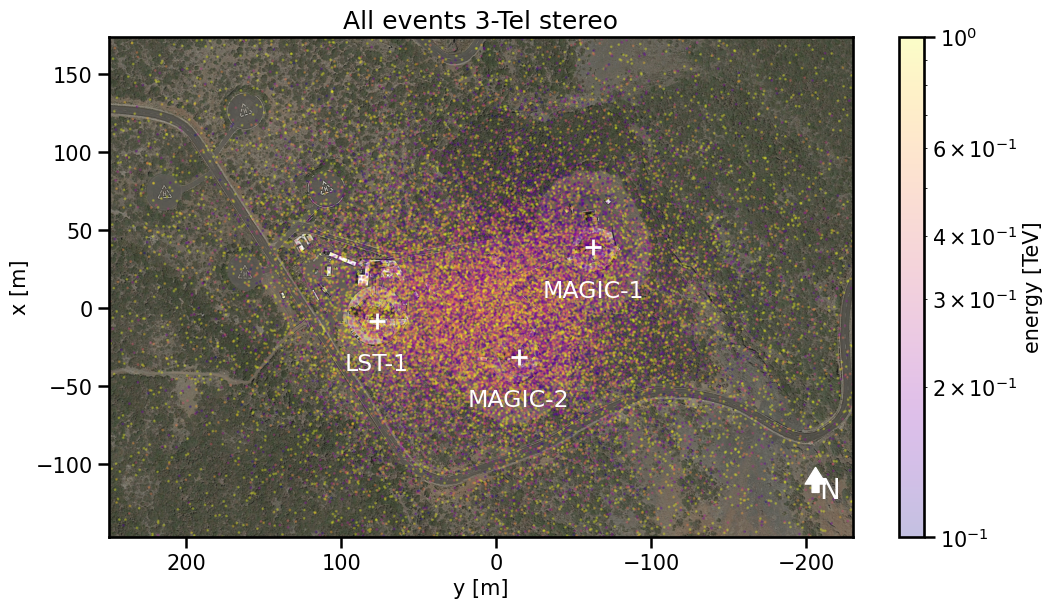

In [9]:
fig, ax = plt.subplots(figsize=(12,6.5))
ax.set_title(f'All events 3-Tel stereo')

for i in range(len(xpos)):
    ax.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

ax.imshow(mapZoom, extent=[*xlim2, *ylim2], aspect='auto', alpha=0.95)
sc = ax.scatter(yq, xq, c=eq, marker='.', alpha=.25, cmap='plasma', s=5, norm=colors.LogNorm(vmin=.1, vmax=1))
fig.colorbar(sc, label='energy [TeV]')

# north arrow
ax.annotate('',  xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', arrowprops=dict(facecolor='w', 
            width=5, headwidth=15, ec='w'), ha='center', va='center', fontsize=20, xycoords=ax.transAxes)
ax.text(-215, -117, 'N', color='w', ha='center', va='center', fontsize=20)

ax.set_xlim(*xlim2)
ax.set_ylim(ylim2[0],ylim2[1]-30)
ax.set_xlabel('y [m]'); ax.set_ylabel('x [m]')
plt.show()

### Representing `impact_parameter`

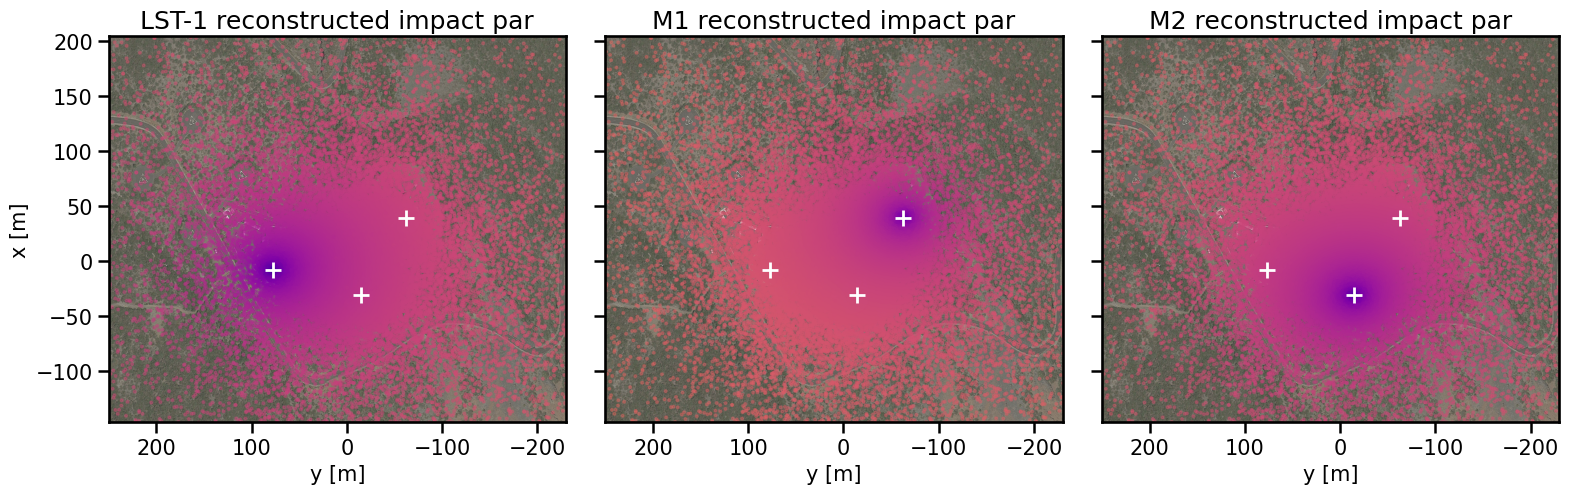

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5.2), sharey=True)
ax1.set_title('LST-1 reconstructed impact par')
ax2.set_title('M1 reconstructed impact par')
ax3.set_title('M2 reconstructed impact par')

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(*xlim2)
    ax.set_ylim(ylim2[0],ylim2[1]-30)
    ax.imshow(mapZoom, extent=[*xlim2, *ylim2], aspect='auto', alpha=0.85)
    for i in range(len(xpos)):
        ax.plot(xpos[i], ypos[i], '+', color='w', ms=12)

ax1.scatter(yq, xq, c=iq1, marker='.', alpha=0.4, cmap='plasma', s=15, norm=colors.LogNorm(),)
ax2.scatter(yq, xq, c=iq2, marker='.', alpha=0.4, cmap='plasma', s=15, norm=colors.LogNorm(),)
ax3.scatter(yq, xq, c=iq3, marker='.', alpha=0.4, cmap='plasma', s=15, norm=colors.LogNorm(),)
# fig.colorbar(sc, label='impact parameter', ax=ax3)

xlimN, ylimN = (110, -100), (-60, 90)
for ax in [ax1, ax2, ax3]:
    ax.set_xlim(*xlim2)
    ax.set_ylim(*ylim2)
    ax.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')

fig.tight_layout()
plt.show()

### Other `non-3T` telescope event distributions

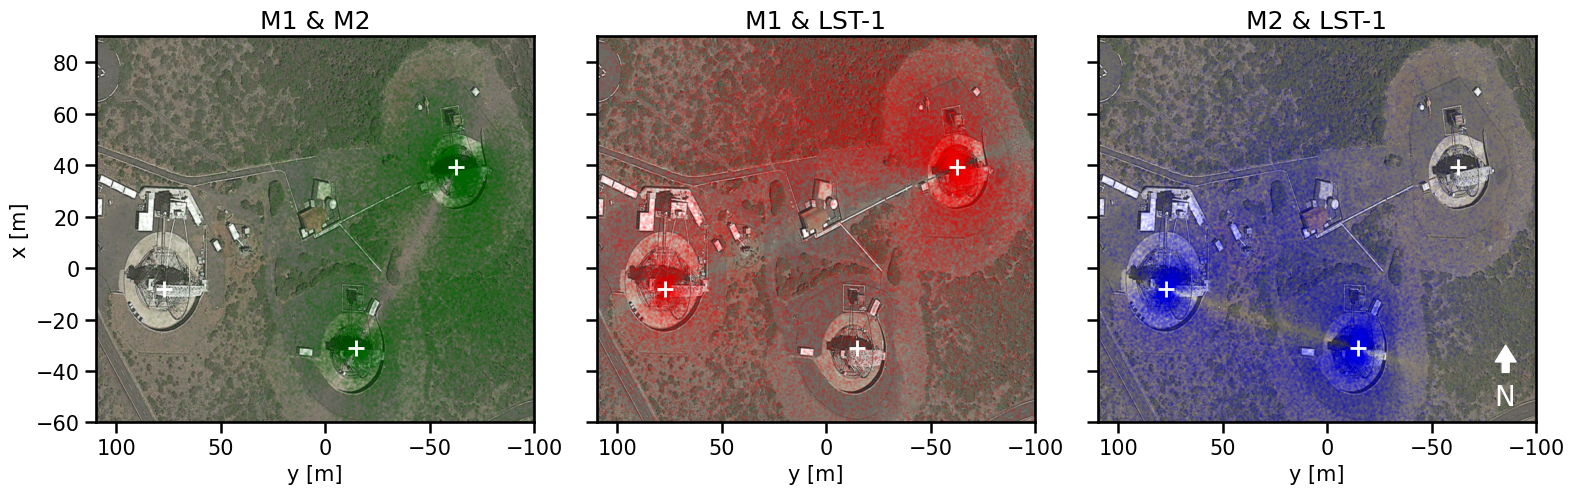

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5.2), sharey=True)
ax1.set_title('M1 & M2')
ax2.set_title('M1 & LST-1')
ax3.set_title('M2 & LST-1')

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(*xlim2)
    ax.set_ylim(ylim2[0],ylim2[1]-30)
    ax.imshow(mapZoom, extent=[*xlim2, *ylim2], aspect='auto', alpha=0.85)
    for i in range(len(xpos)):
        ax.plot(xpos[i], ypos[i], '+', color='w', ms=12)

ax1.scatter(yc0[:200000], xc0[:200000], c='darkgreen', marker='.', alpha=0.04, s=5, )
ax2.scatter(yc1[:200000], xc1[:200000], c='r',         marker='.', alpha=0.05, s=5, )
ax3.scatter(yc2[:200000], xc2[:200000], c='b',         marker='.', alpha=0.03, s=5, )

# north arrow
ax3.annotate('', xy=(xa-.02, ya+.06), xytext=(xa-.02, ya+.06-arrow_length-.02), color='w',
            arrowprops=dict(facecolor='w', width=5, headwidth=15, ec='w'), fontsize=20, xycoords=ax.transAxes)
ax3.text(-85, -50, 'N', color='w', ha='center', va='center', fontsize=20)

xlimN, ylimN = (110, -100), (-60, 90)
for ax in [ax1, ax2, ax3]:
    ax.set_xlim(*xlimN)
    ax.set_ylim(*ylimN)
    ax.set_xlabel('y [m]')
ax1.set_ylabel('x [m]')

fig.tight_layout()
plt.show()

### All events  `3-T` total plot

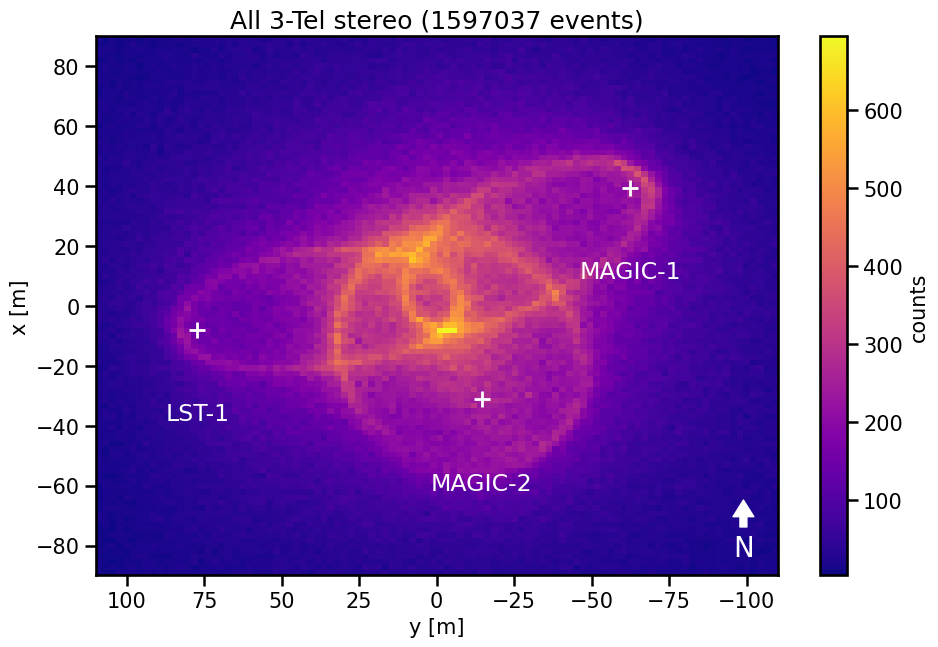

In [12]:
fig, ax = plt.subplots(figsize=(11,7))
ax.set_title(f'All 3-Tel stereo ({len(yc3)} events)')

# ax.plot(*aux.incenter(xpos, ypos), 'x', color='w', ms=15, label='incenter')

for i in range(len(xpos)):
    ax.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax.text(xpos[i], ypos[i] - 28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)
    

_, _, _, im = ax.hist2d(yc3, xc3, bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts')

# north arrow
ax.annotate('',  xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', arrowprops=dict(facecolor='w', 
            width=5, headwidth=15, ec='w'), ha='center', va='center', fontsize=20, xycoords=ax.transAxes)
ax.text(-99, -81, 'N', color='w', ha='center', va='center', fontsize=20)

# ax.legend(loc=2)
ax.set_xlim(*xlim);     ax.set_ylim(*ylim)
ax.set_xlabel('y [m]'); ax.set_ylabel('x [m]')
plt.show()

### All events  `3-T` total plot; ellipse geometry

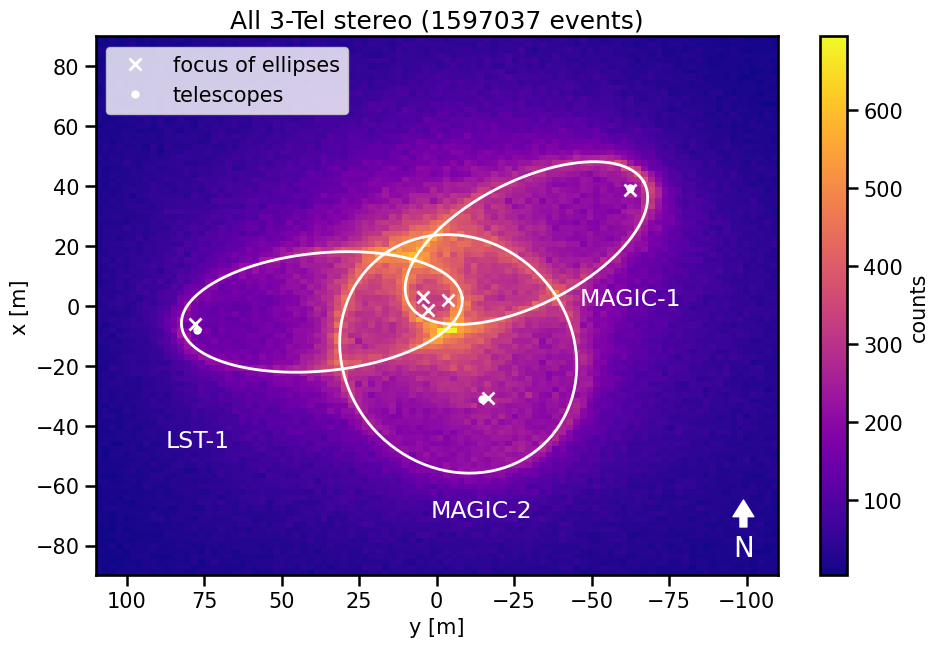

In [13]:
fig, ax = plt.subplots(figsize=(11,7))
ax.set_title(f'All 3-Tel stereo ({len(yc3)} events)')

for i in range(len(xpos)):
    ax.plot(xpos[i], ypos[i], '.', color='w', ms=8)
    ax.text(xpos[i], ypos[i]-37, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

# plotting ellipses
u, v, a, b, t_rot = -7, -16, 41, 37, 0.99
geom.plot_ellipse(u, v, a, b, t_rot, ax)
f1 = geom.focus_points([u, v], a, b, t_rot)
ax.plot(f1[0], f1[1], 'x', color='w', ms=8)

u, v, a, b, t_rot = -29, 21, 43, 20.5, 2.65
geom.plot_ellipse(u, v, a, b, t_rot, ax)
f2 = geom.focus_points([u, v], a, b, t_rot)
ax.plot(f2[0], f2[1], 'x', color='w', ms=8)

u, v, a, b, t_rot = 37, -2, 45.5, 19.7, 3.04
geom.plot_ellipse(u, v, a, b, t_rot, ax)
f3 = geom.focus_points([u, v], a, b, t_rot)
ax.plot(f3[0], f3[1], 'x', color='w', ms=8, label='focus of ellipses')


_, _, _, im = ax.hist2d(yc3, xc3, bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts')

# north arrow
ax.annotate('',  xy=(xa, ya), xytext=(xa, ya-arrow_length), color='w', arrowprops=dict(facecolor='w', 
            width=5, headwidth=15, ec='w'), ha='center', va='center', fontsize=20, xycoords=ax.transAxes)
ax.text(-99, -81, 'N', color='w', ha='center', va='center', fontsize=20)

plt.plot([], [], '.', color='w', ms=8, label='telescopes')
ax.legend(loc=2)
ax.set_xlim(*xlim);     ax.set_ylim(*ylim)
ax.set_xlabel('y [m]'); ax.set_ylabel('x [m]')
plt.show()

### - Filtering by `h_max`

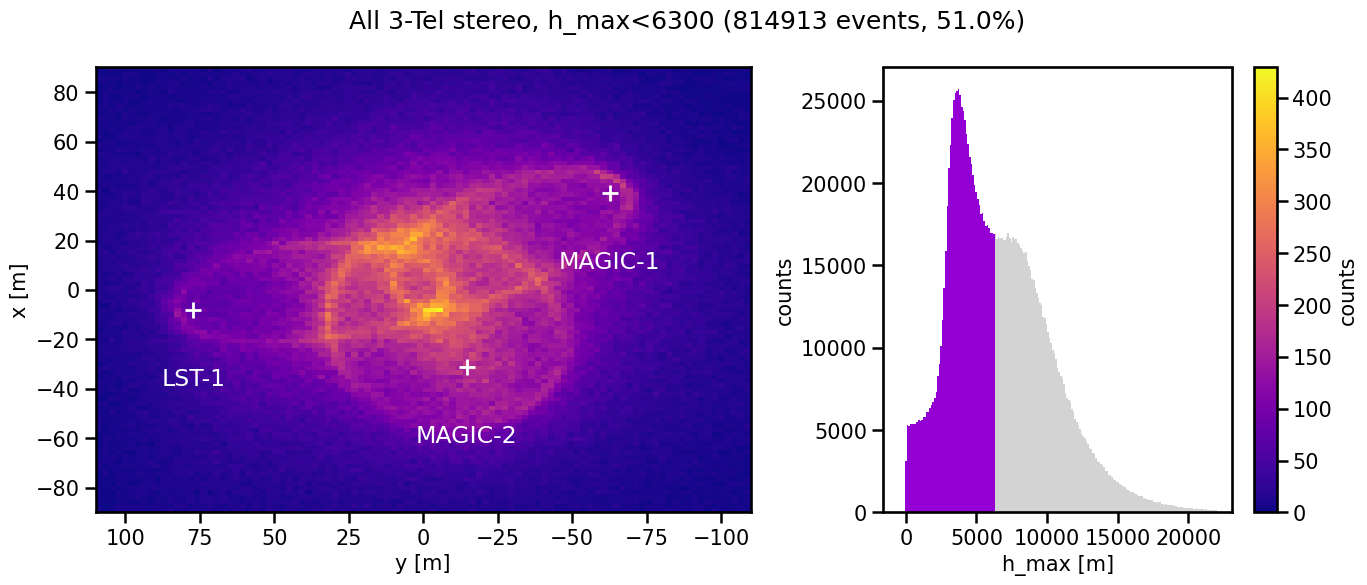

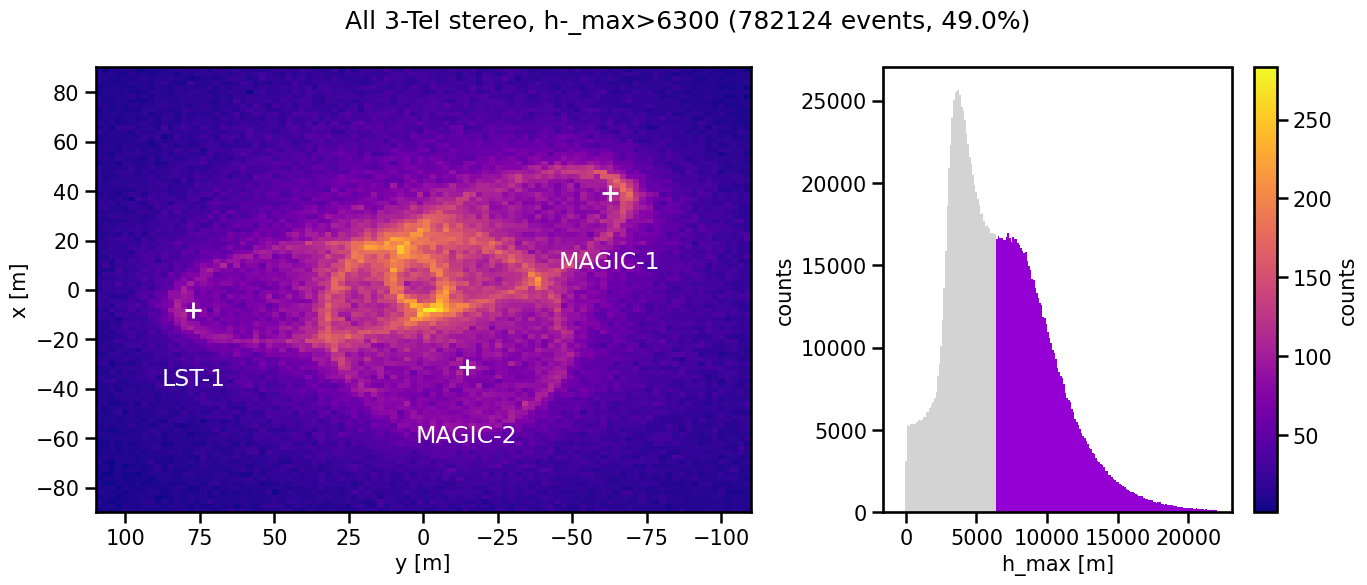

In [15]:
bins = np.linspace(-500, 22000, 200)
index = np.where((bins > h_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, h_max<{h_lim} ({len(h00)} events, {len(h00) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(h00['core_y'], h00['core_x'], bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['h_max'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['h_max'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('h_max [m]'); ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, h-_max>{h_lim} ({len(h65)} events, {len(h65) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(h65['core_y'], h65['core_x'], bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['h_max'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['h_max'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('h_max [m]'); ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `|slope|`

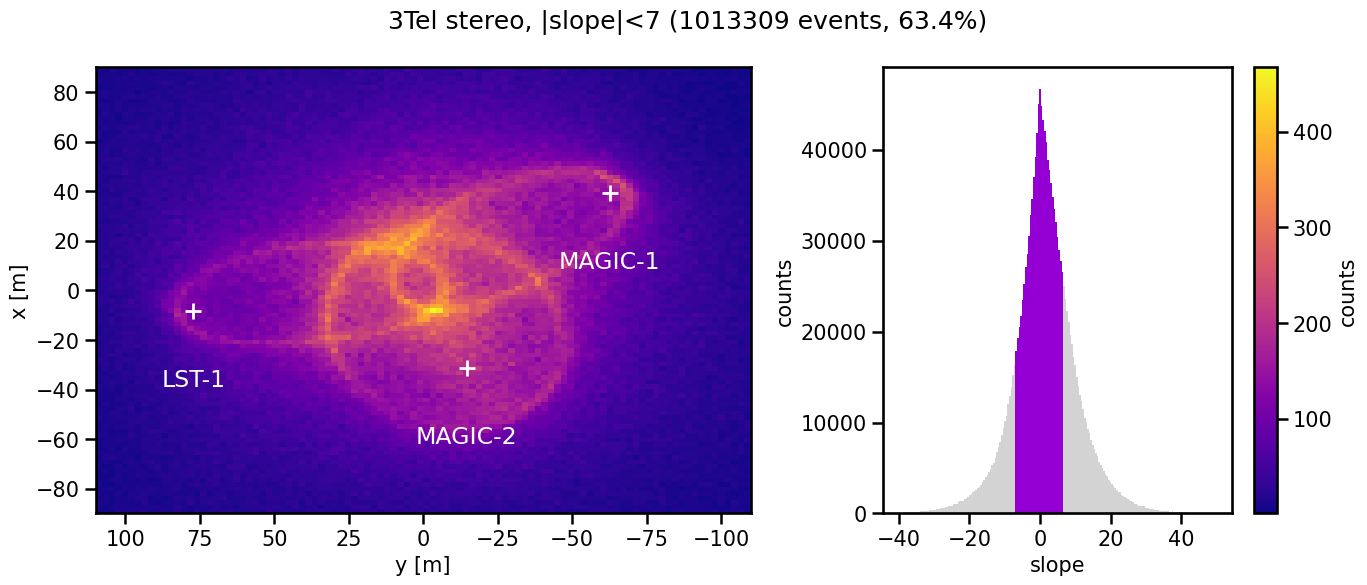

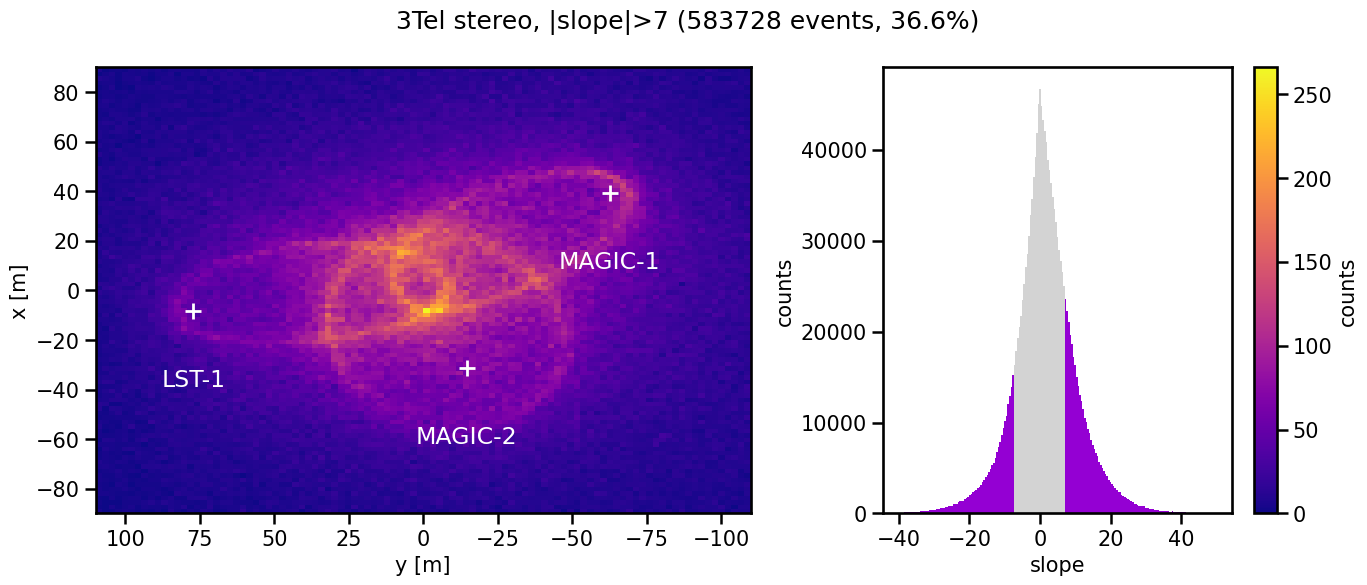

In [16]:
# binning
bins  = np.linspace(-40, 50, 200)
index1, index2 = np.where((bins > -slope_lim) == True)[0][0], np.where((bins > slope_lim) == True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, |slope|<{slope_lim} ({len(slope_low)} events, {len(slope_low)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(slope_low['core_y'], slope_low['core_x'], 
                         bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['slope'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['slope'], bins=bins[index1:index2], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('slope'); ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, |slope|>{slope_lim} ({len(slope_up)} events, {len(slope_up)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(slope_up['core_y'], slope_up['core_x'], 
                         bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['slope'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['slope'], bins=bins[:index1], histtype='stepfilled', color='darkviolet')
plt.hist(c3['slope'], bins=bins[index2:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('slope'); ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `gammaness`

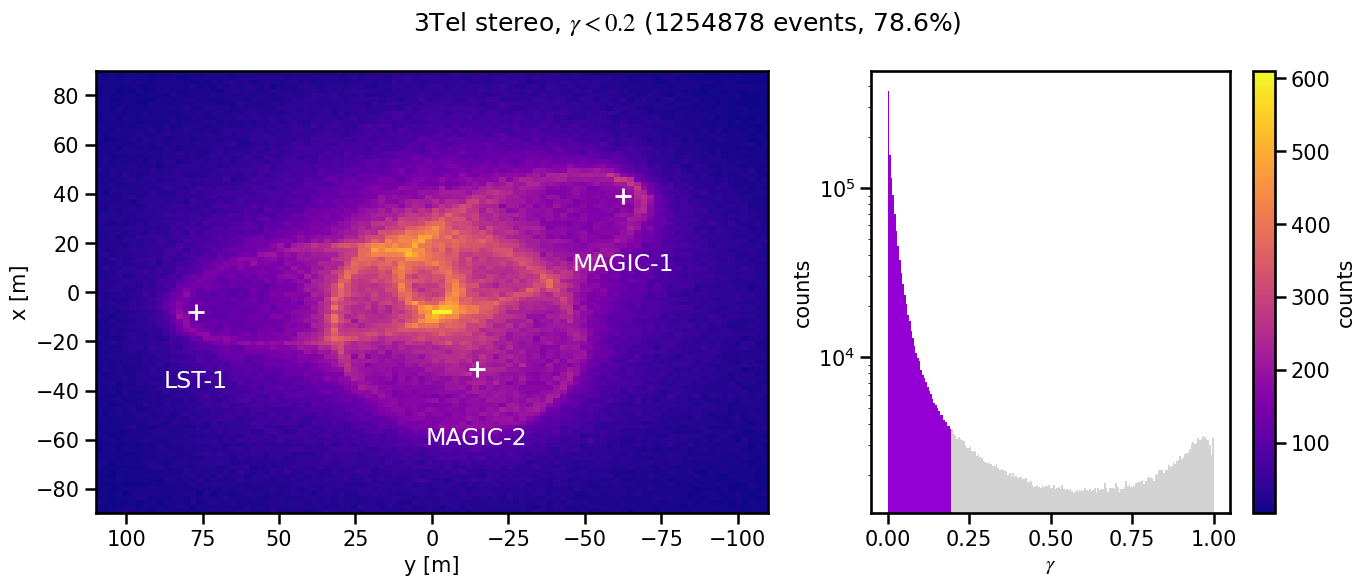

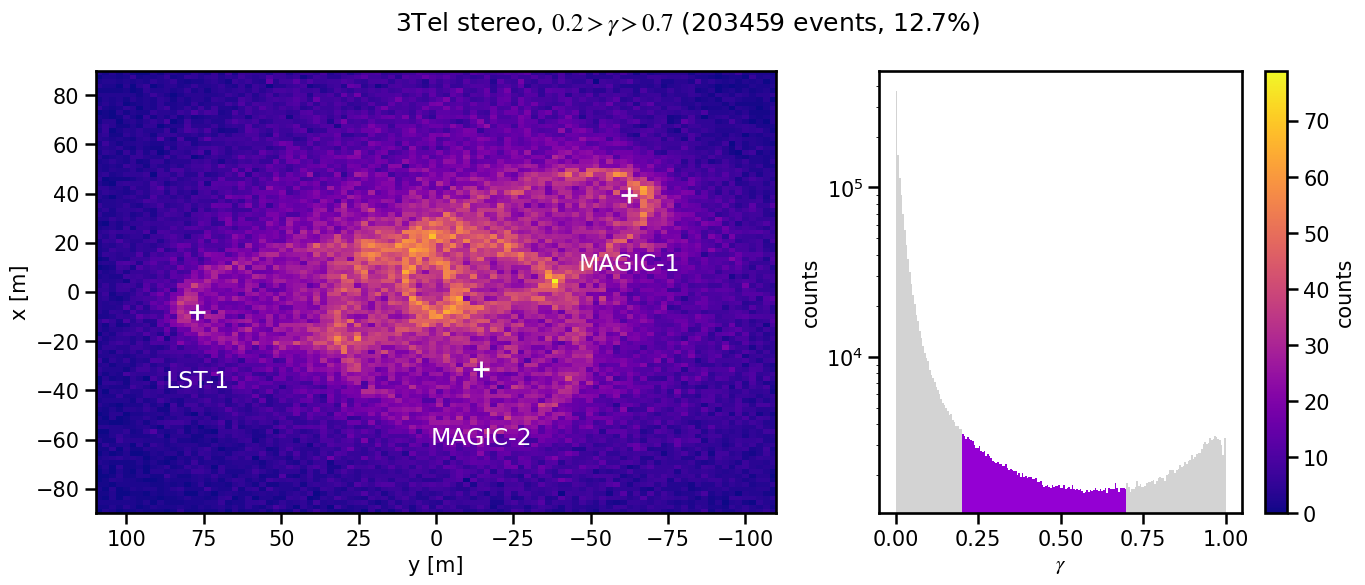

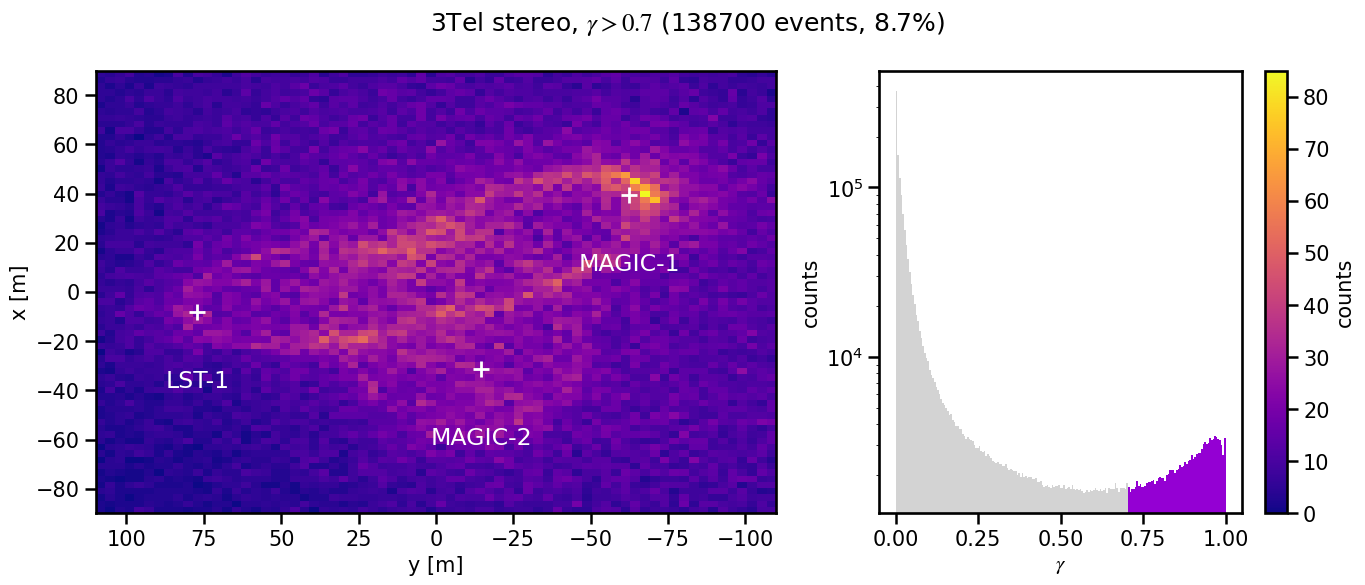

In [11]:
# binning
bins = np.linspace(0, 1, 200)
index1, index2 = np.where((bins > g_lim1) == True)[0][0], np.where((bins > g_lim2) == True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, $\gamma<{g_lim1}$ ({len(gamma_low)} events, {len(gamma_low)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(gamma_low['core_y'], gamma_low['core_x'], 
                         bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['gammaness'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['gammaness'], bins=bins[:index1], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('$\\gamma$'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, ${g_lim1}>\gamma>{g_lim2}$ ({len(gamma_mid)} events, {len(gamma_mid)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(gamma_mid['core_y'], gamma_mid['core_x'], 
                         bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['gammaness'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['gammaness'], bins=bins[index1:index2], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('$\\gamma$'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, $\gamma>{g_lim2}$ ({len(gamma_up)} events, {len(gamma_up)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(gamma_up['core_y'], gamma_up['core_x'], 
                         bins=70, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['gammaness'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['gammaness'], bins=bins[index2:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('$\\gamma$'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

### - Filtering by `gammaness_var`

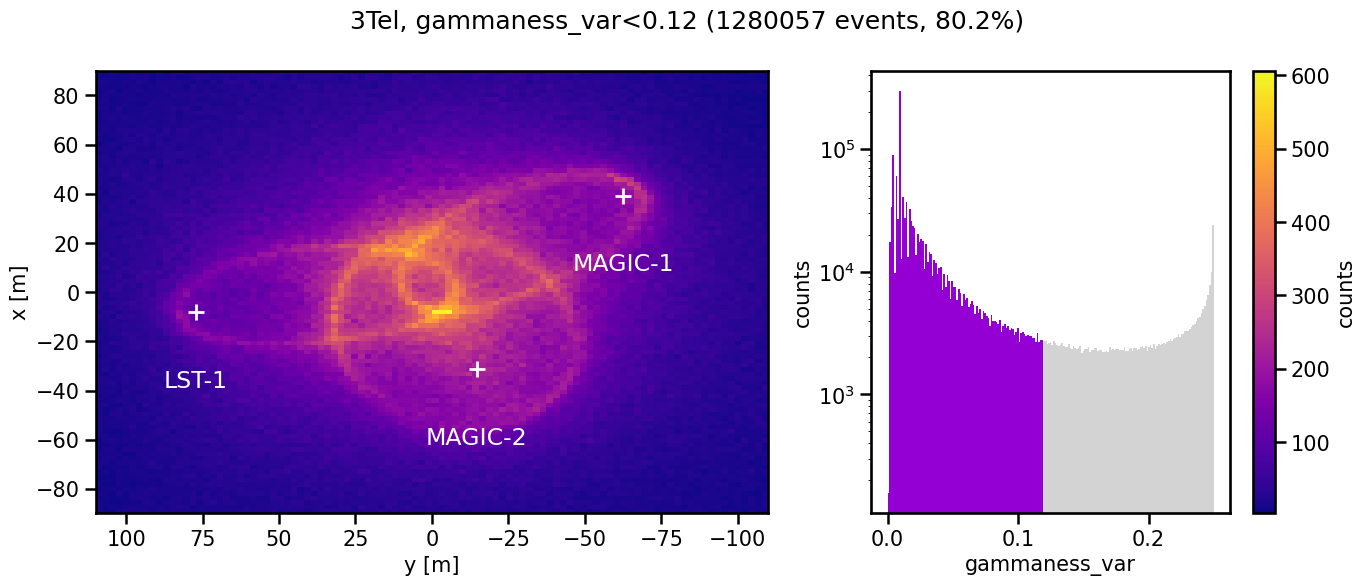

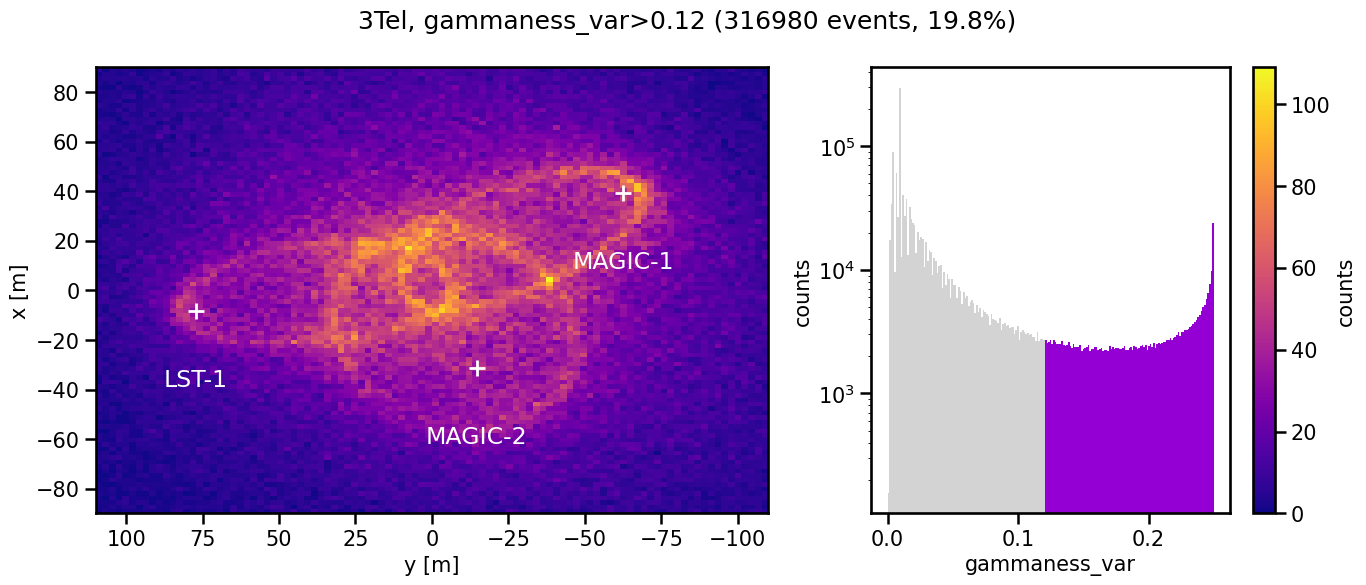

In [12]:
# binning
bins = np.linspace(0, 0.25, 200)
index = np.where((bins > gv_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, gammaness_var<{gv_lim} ({len(gv_low)} events, {len(gv_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(gv_low['core_y'], gv_low['core_x'], bins=100, range=[np.flip(xlim), ylim],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['gammaness_var'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['gammaness_var'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('gammaness_var'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, gammaness_var>{gv_lim} ({len(gv_up)} events, {len(gv_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(gv_up['core_y'], gv_up['core_x'], bins=100, range=[np.flip(xlim), ylim], 
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['gammaness_var'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['gammaness_var'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('gammaness_var'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

### - Filtering by `intensity`

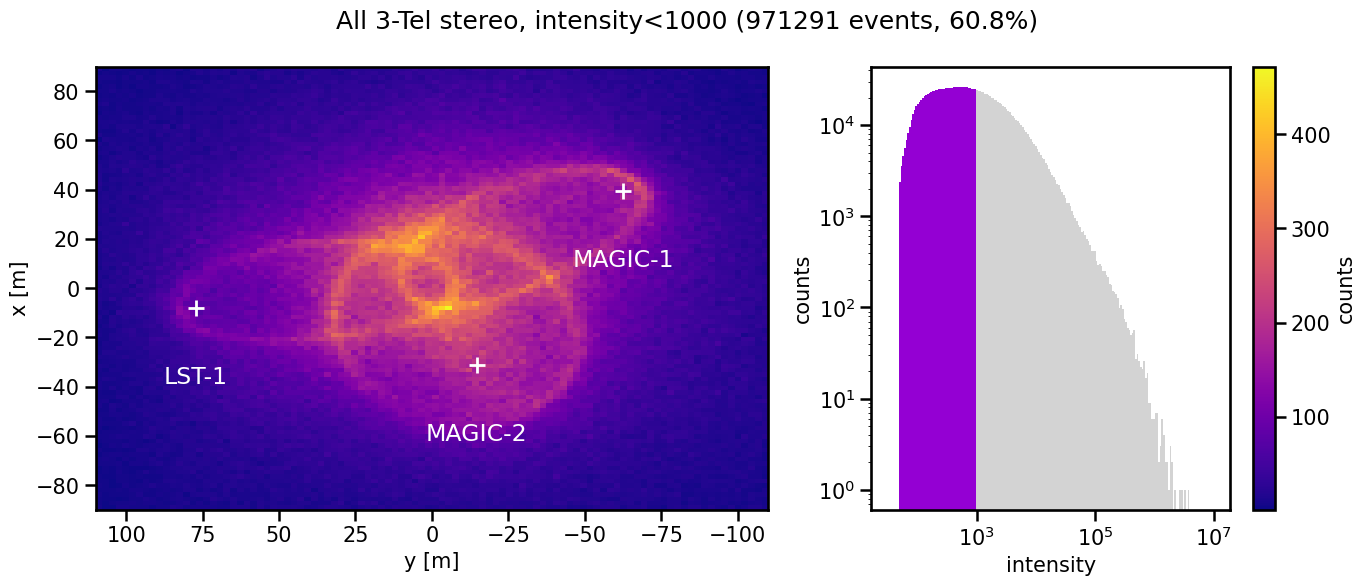

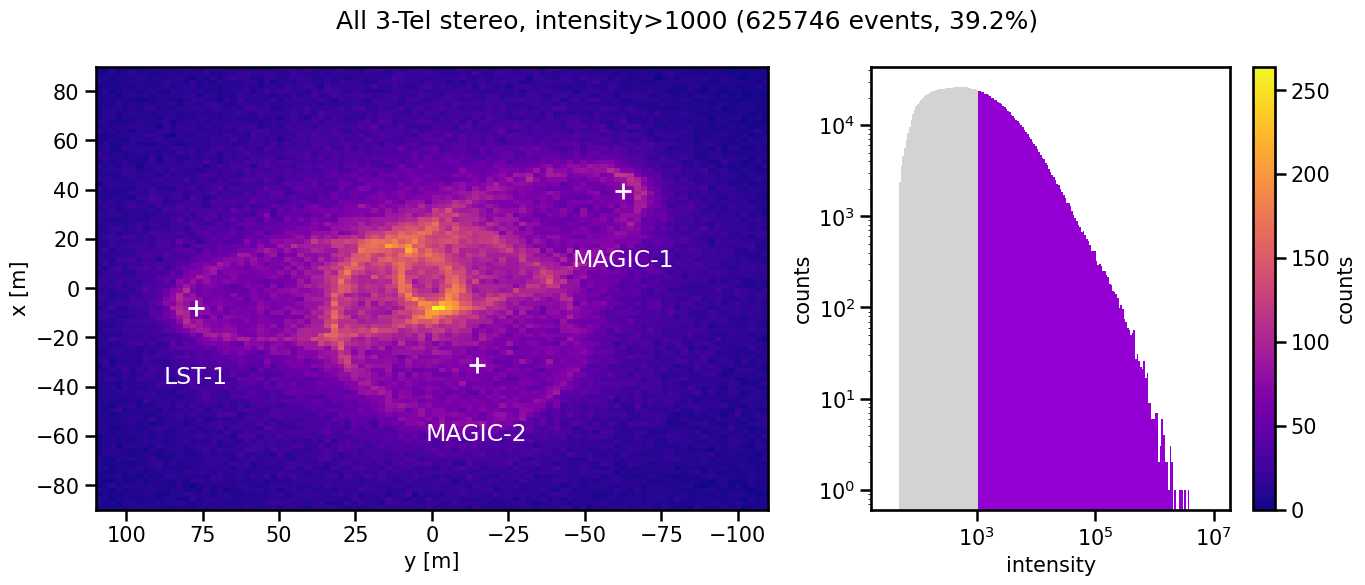

In [13]:
# binning
bins = np.logspace(1.5, 7, 200)
index = np.where((bins > i_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, intensity<{i_lim} ({len(i_low)} events, {len(i_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(i_low['core_y'], i_low['core_x'], bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['intensity'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['intensity'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('intensity'); ax2.set_ylabel('counts')
ax2.loglog()
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, intensity>{i_lim} ({len(i_up)} events, {len(i_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(i_up['core_y'], i_up['core_x'], bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['intensity'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['intensity'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('intensity'); ax2.set_ylabel('counts')
ax2.loglog()
fig.tight_layout()
plt.show()

### - Filtering by `reco_energy`

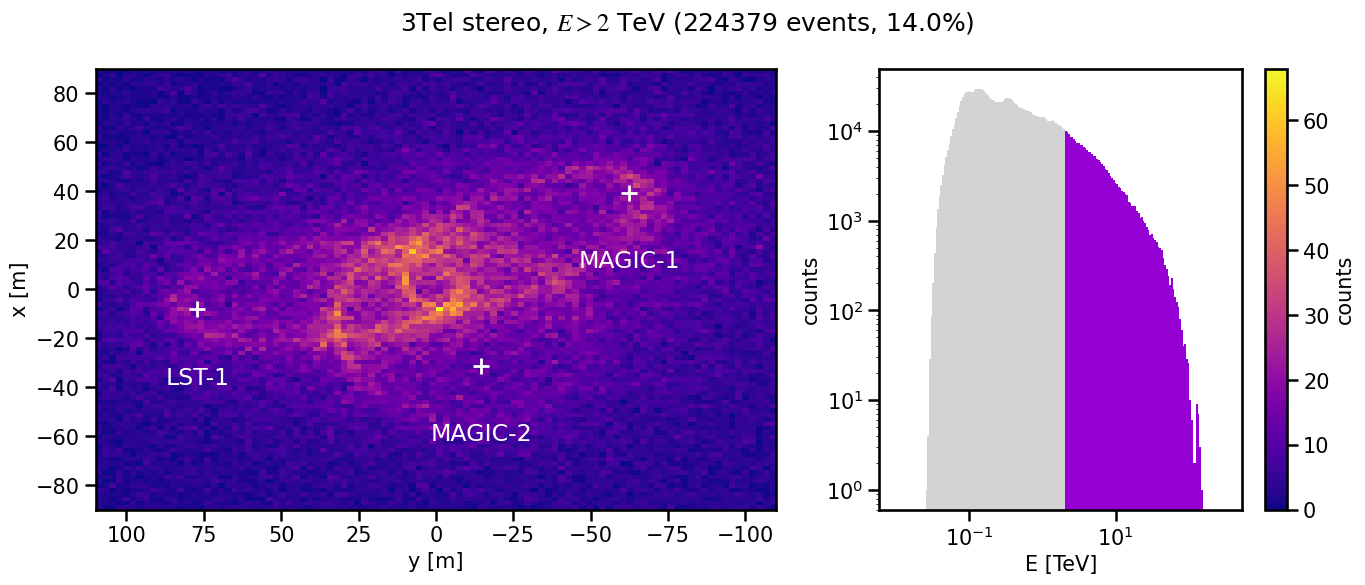

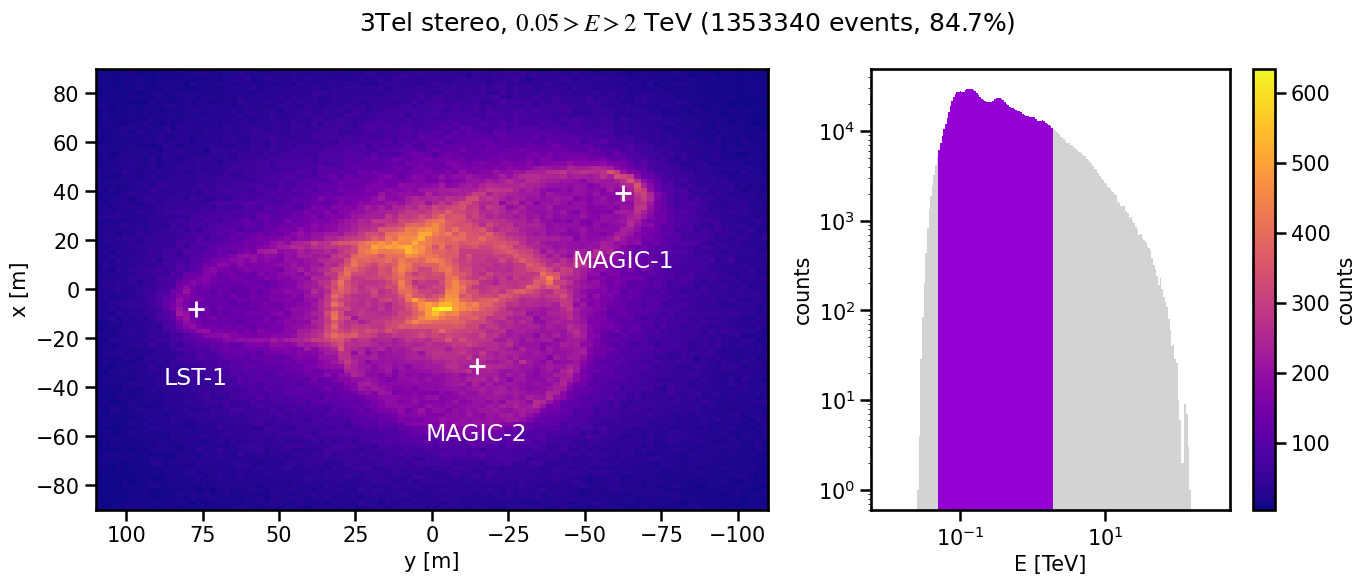

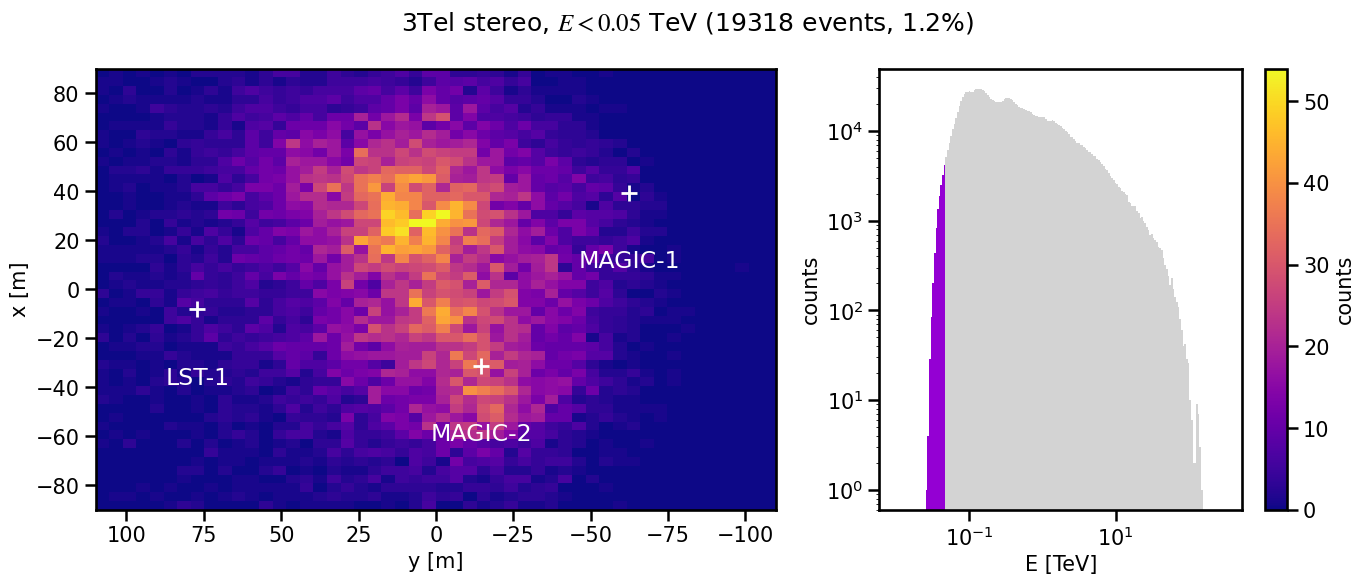

In [14]:
# binning
bins = np.logspace(-2, 2.5, 200)
index1, index2 = np.where((bins > e_lim1) == True)[0][0], np.where((bins > e_lim2) == True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, $E>{e_lim2}$ TeV ({len(e_up)} events, {len(e_up)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(e_up['core_y'], e_up['core_x'], 
                         bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['reco_energy'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['reco_energy'], bins=bins[index2:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('E [TeV]'); ax2.set_ylabel('counts')
ax2.loglog()
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, ${e_lim1}>E>{e_lim2}$ TeV ({len(e_mid)} events, {len(e_mid)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(e_mid['core_y'], e_mid['core_x'], 
                         bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['reco_energy'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['reco_energy'], bins=bins[index1:index2], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('E [TeV]'); ax2.set_ylabel('counts')
ax2.loglog()
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel stereo, $E<{e_lim1}$ TeV ({len(e_low)} events, {len(e_low)/len(c3)*100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(e_low['core_y'], e_low['core_x'], 
                         bins=50, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['reco_energy'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['reco_energy'], bins=bins[:index1], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('E [TeV]'); ax2.set_ylabel('counts')
ax2.loglog()
fig.tight_layout()
plt.show()

### - Filtering by `reco_energy_var`

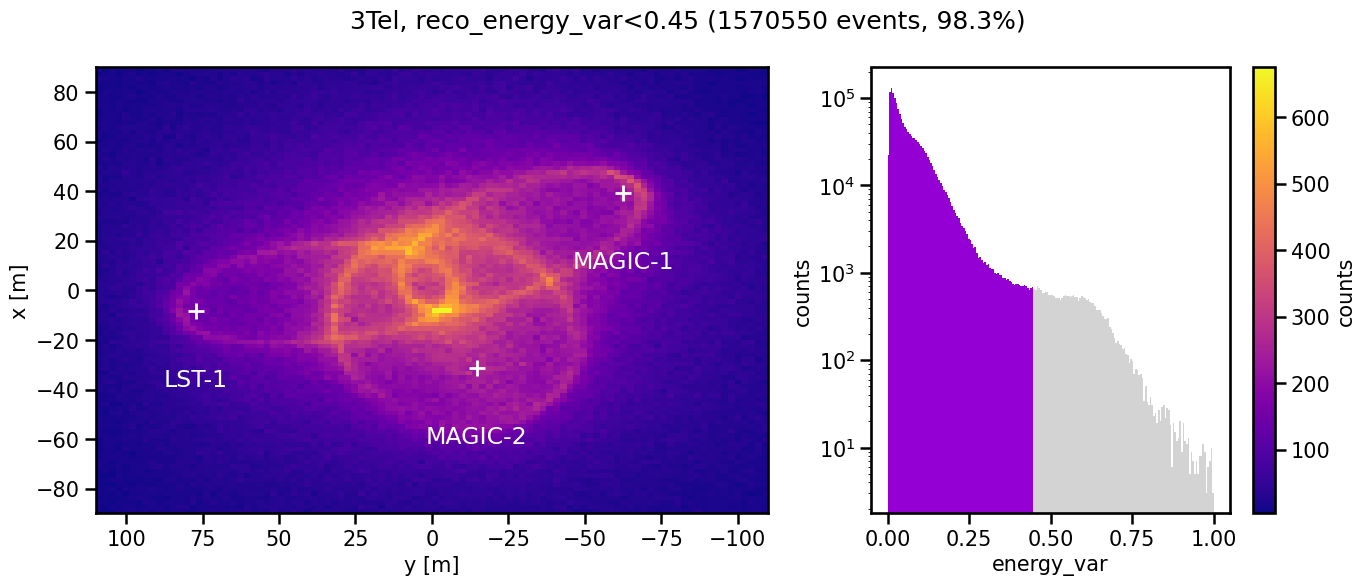

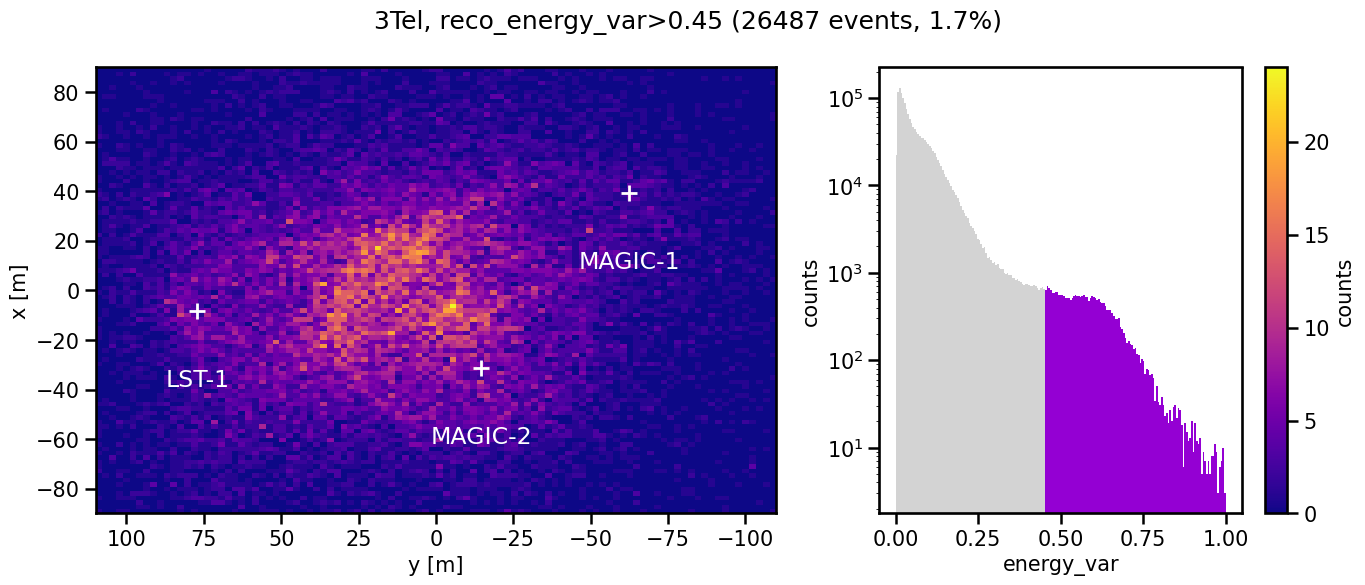

In [15]:
# binning
bins = np.linspace(0, 1, 200)
index = np.where((bins > ev_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, reco_energy_var<{ev_lim} ({len(ev_low)} events, {len(ev_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(ev_low['core_y'], ev_low['core_x'], bins=100, range=[np.flip(xlim), ylim],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['reco_energy_var'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['reco_energy_var'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('energy_var'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, reco_energy_var>{ev_lim} ({len(ev_up)} events, {len(ev_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(ev_up['core_y'], ev_up['core_x'], bins=100, range=[np.flip(xlim), ylim], 
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['reco_energy_var'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['reco_energy_var'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('energy_var'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

### - Filtering by `disp_diff_mean`

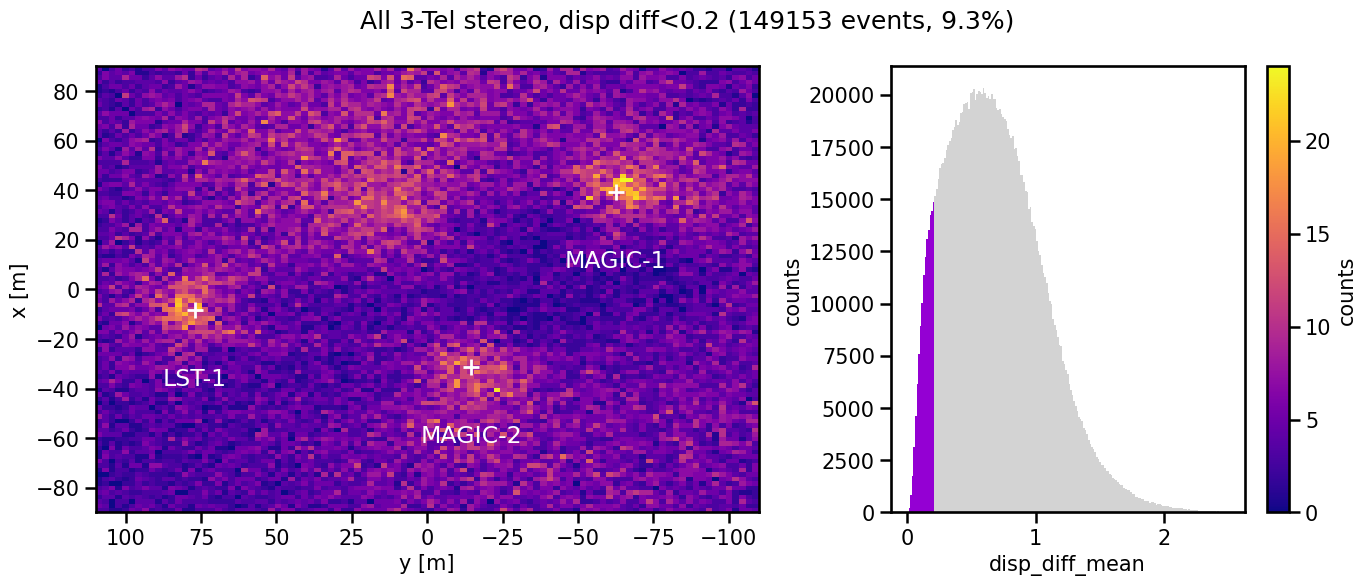

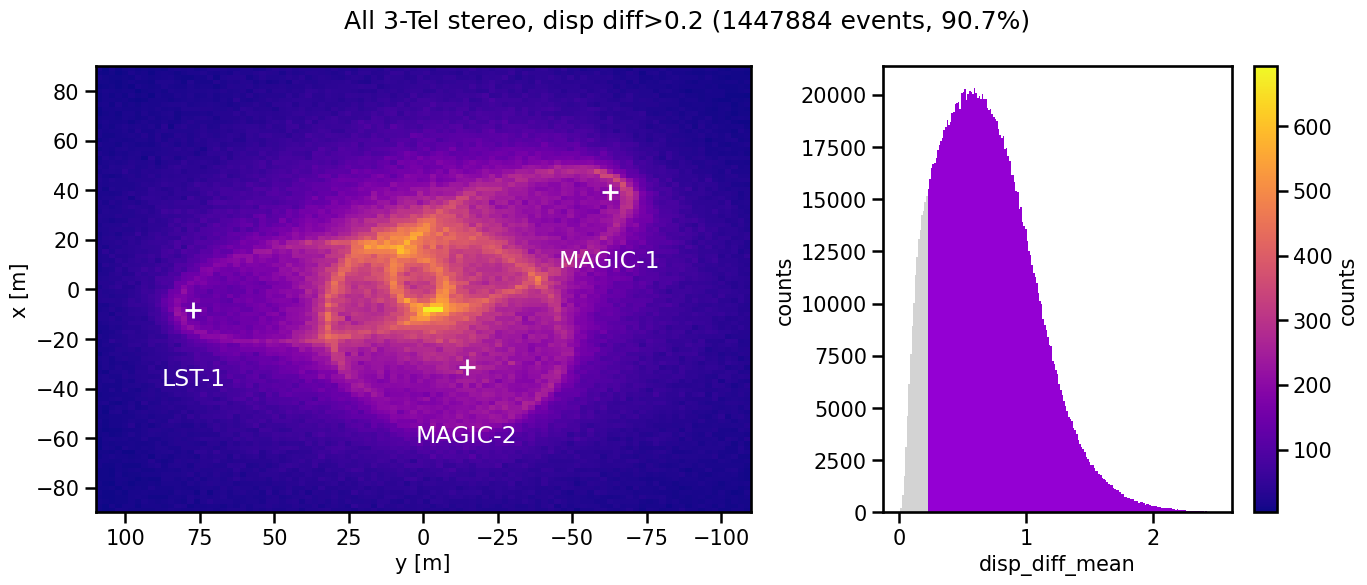

In [16]:
# binning
bins = np.linspace(0, 2.5, 200)
index = np.where((bins > d_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, disp diff<{d_lim:.1f} ({len(d_low)} events, {len(d_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(d_low['core_y'], d_low['core_x'], bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['disp_diff_mean'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['disp_diff_mean'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('disp_diff_mean'); ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'All 3-Tel stereo, disp diff>{d_lim:.1f} ({len(d_up)} events, {len(d_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(d_up['core_y'], d_up['core_x'], bins=100, range=[np.flip(xlim), ylim], cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['disp_diff_mean'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['disp_diff_mean'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('disp_diff_mean'); ax2.set_ylabel('counts')
fig.tight_layout()
plt.show()

### - Filtering by `length`

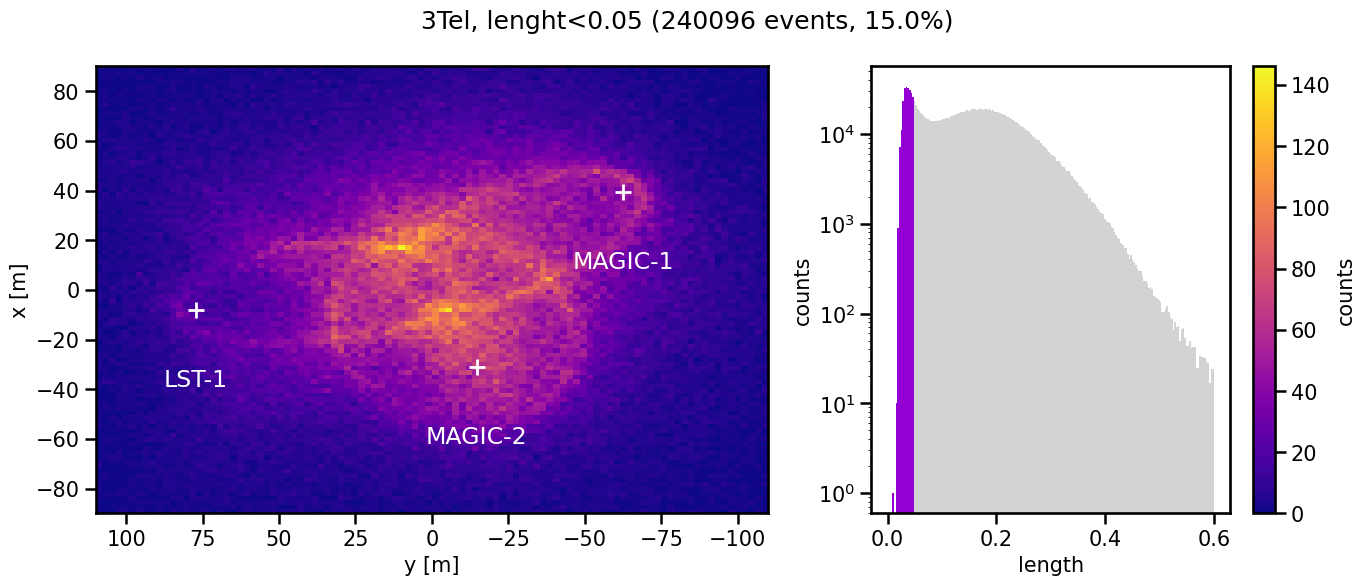

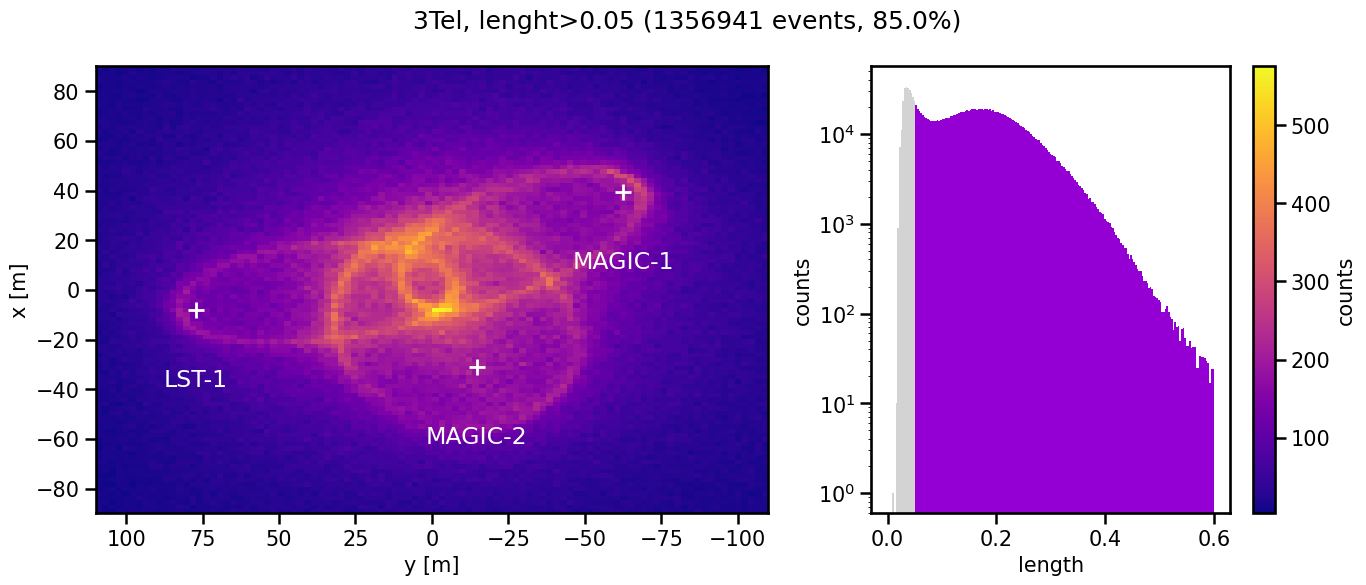

In [17]:
# binning
bins = np.linspace(0, 0.6, 200)
index = np.where((bins > len_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, lenght<{len_lim} ({len(len_low)} events, {len(len_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(len_low['core_y'], len_low['core_x'], bins=100, range=[np.flip(xlim), ylim],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['length'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['length'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('length'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, lenght>{len_lim} ({len(len_up)} events, {len(len_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(len_up['core_y'], len_up['core_x'], bins=100, range=[np.flip(xlim), ylim], 
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['length'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['length'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('length'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

### - Filtering by `width`

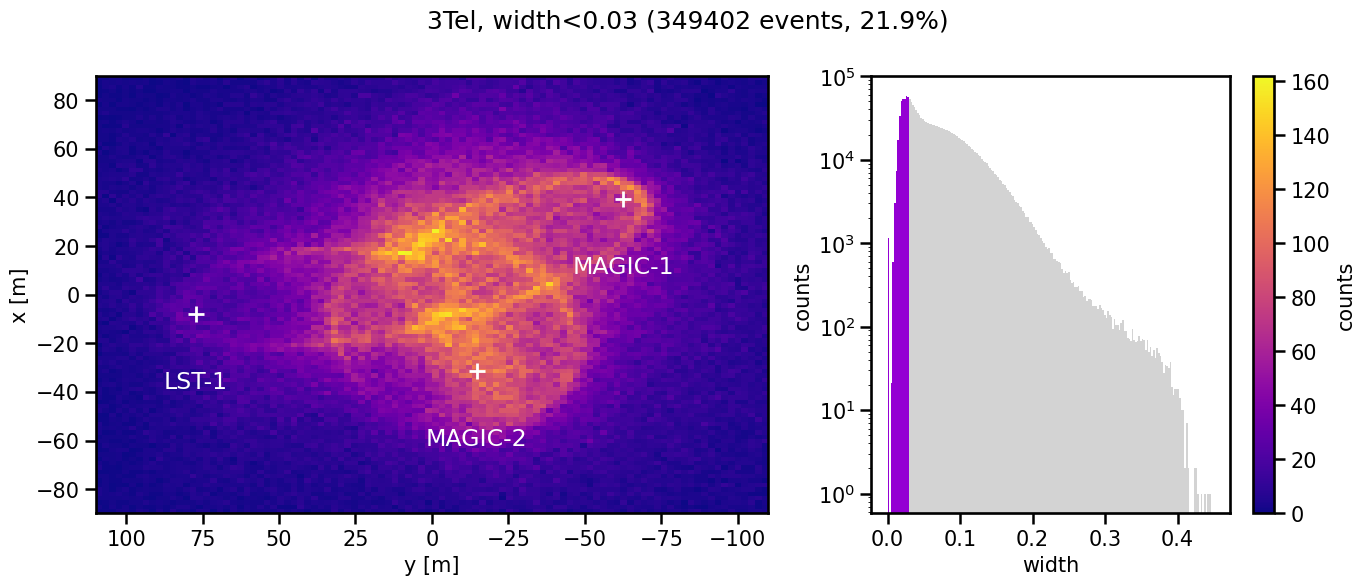

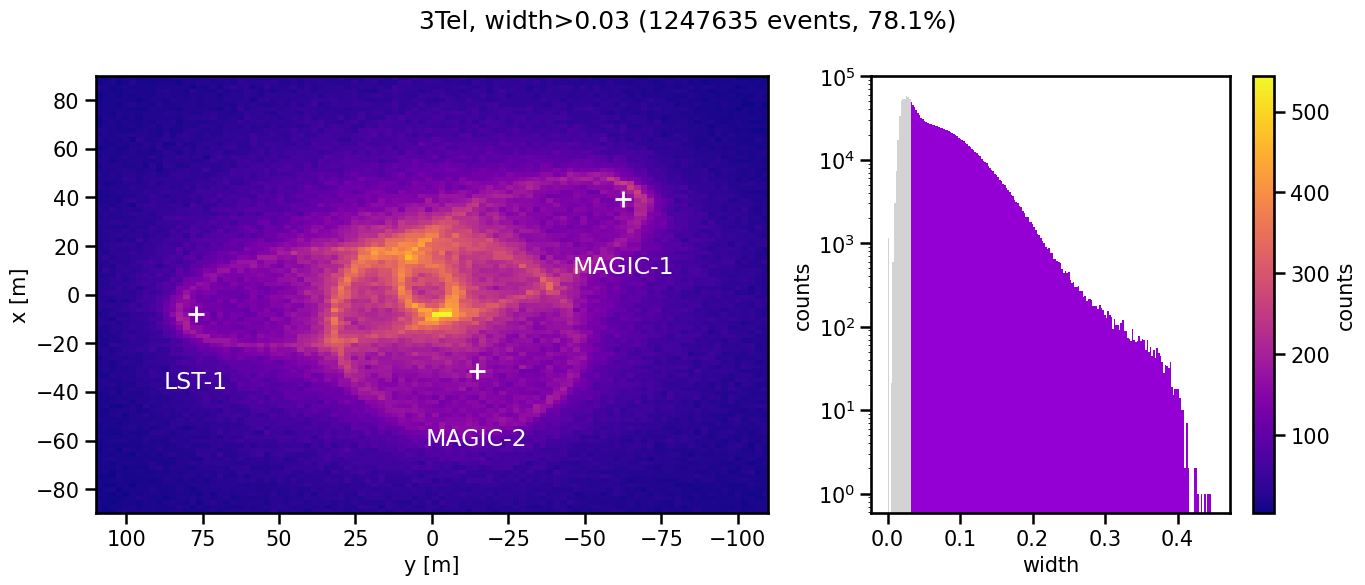

In [18]:
# binning
bins = np.linspace(0, 0.45, 200)
index = np.where((bins > wi_lim)==True)[0][0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, width<{wi_lim} ({len(wi_low)} events, {len(wi_low) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(wi_low['core_y'], wi_low['core_x'], bins=100, range=[np.flip(xlim), ylim],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['width'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['width'], bins=bins[:index], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('width'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, width>{wi_lim} ({len(wi_up)} events, {len(wi_up) / len(c3) * 100:.1f}%)')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(wi_up['core_y'], wi_up['core_x'], bins=100, range=[np.flip(xlim), ylim], 
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

plt.hist(c3['width'], bins=bins, histtype='stepfilled', color='lightgray')
plt.hist(c3['width'], bins=bins[index:], histtype='stepfilled', color='darkviolet')

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('width'); ax2.set_ylabel('counts')
ax2.set_yscale('log')
fig.tight_layout()
plt.show()

## Filtering by `intensity`-`length` diagram

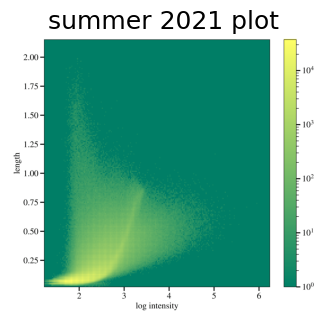

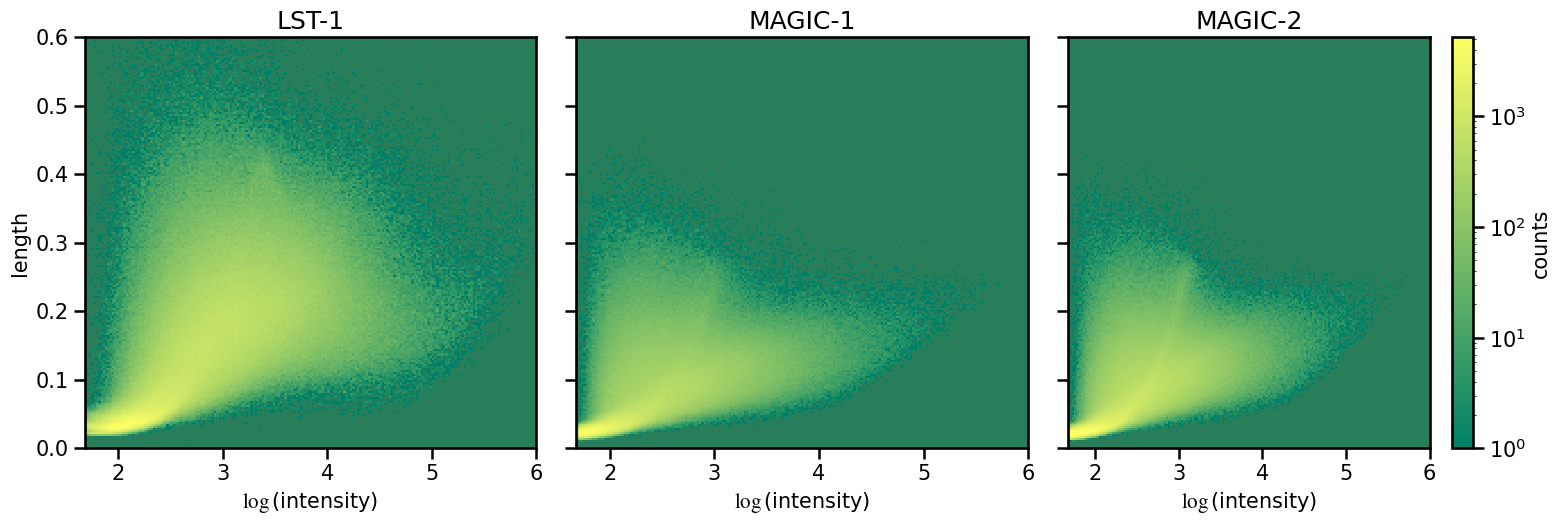

In [19]:
fig, ax = plt.subplots(figsize=(5.8,3.6))
imPlot  = plt.imread('/fefs/aswg/workspace/juan.jimenez/stereo_analysis/config_files/images/intensity_length.png')
ax.imshow(imPlot)
ax.axis('off')
ax.set_title('summer 2021 plot')
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5.5), sharey=True)
ax1.set_title(f'LST-1')
ax2.set_title(f'MAGIC-1')
ax3.set_title(f'MAGIC-2')

binsx, binsy = np.linspace(1.68, 6, 200), np.linspace(0, 0.6, 200)
bins = (binsx, binsy)
_, _, _, im = ax1.hist2d(np.log10(c3['intensity'].to_numpy()), 
                        (c3['length'].to_numpy()),
                        bins=bins, cmap='summer', norm = colors.LogNorm())
_, _, _, im = ax2.hist2d(np.log10(df.query(f'combo_type == 3',).query(f'tel_id == 2')['intensity'].to_numpy()), 
                        (df.query(f'combo_type == 3',).query(f'tel_id == 2')['length'].to_numpy()),
                        bins=bins, cmap='summer', norm = colors.LogNorm())
_, _, _, im = ax3.hist2d(np.log10(df.query(f'combo_type == 3',).query(f'tel_id == 3')['intensity'].to_numpy()), 
                        (df.query(f'combo_type == 3',).query(f'tel_id == 3')['length'].to_numpy()),
                        bins=bins, cmap='summer', norm = colors.LogNorm())
fig.colorbar(im, label='counts', ax=ax3)

ax1.set_ylabel('length')
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor((40/255, 125/255, 90/255))
    ax.set_xlabel('$\log $(intensity)')
fig.tight_layout()
plt.show()

In [20]:
def parabola(logI, disp=1.9, slope=0.18, inter=0.02):
    return slope * (logI - disp) ** 2 + inter

df_copy = c3.copy()

df_copy['x'] = np.log10(df_copy['intensity'].to_numpy())
df_copy['y'] = df_copy['length'].to_numpy()

# Calculate the y values of the parabolic function for each x value
df_copy['parabola_x'] = parabola(df_copy['x'])

# Calculate the distance between each point in the dataset and the corresponding point on the parabolic line
df_copy['distance'] = np.abs(df_copy['y'] - df_copy['parabola_x'])

# Select the points within a certain distance from the parabolic line
threshold = 0.05
df_within = df_copy[df_copy['distance'] < threshold]

# Select the points outside a certain distance from the parabolic line
df_outside = df_copy[df_copy['distance'] >= threshold]

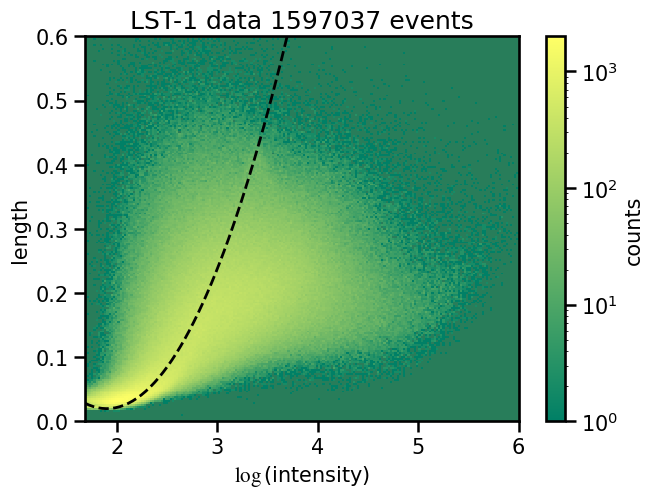

In [21]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title(f'LST-1 data {len(c3)} events')
binsx, binsy = np.linspace(1.68, 6, 200), np.linspace(0, 0.6, 200)
bins = (binsx, binsy)

_, _, _, im = ax.hist2d(np.log10(c3['intensity'].to_numpy()), c3['length'].to_numpy(),
                        bins=bins, cmap='summer', norm=colors.LogNorm())

ax.plot(binsx, parabola(binsx), c='k', ls='--', lw=2)
fig.colorbar(im, label='counts', ax=ax)
ax.set_ylabel('length')
ax.set_facecolor((40/255, 125/255, 90/255))
ax.set_xlabel('$\log $(intensity)')
plt.show()

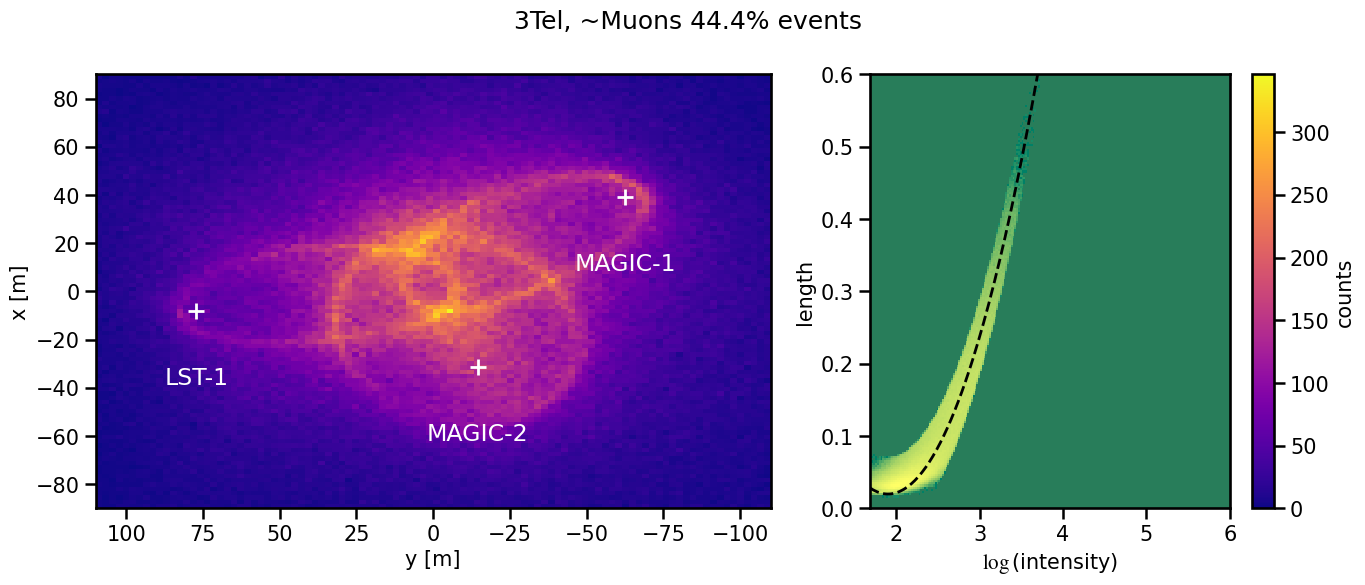

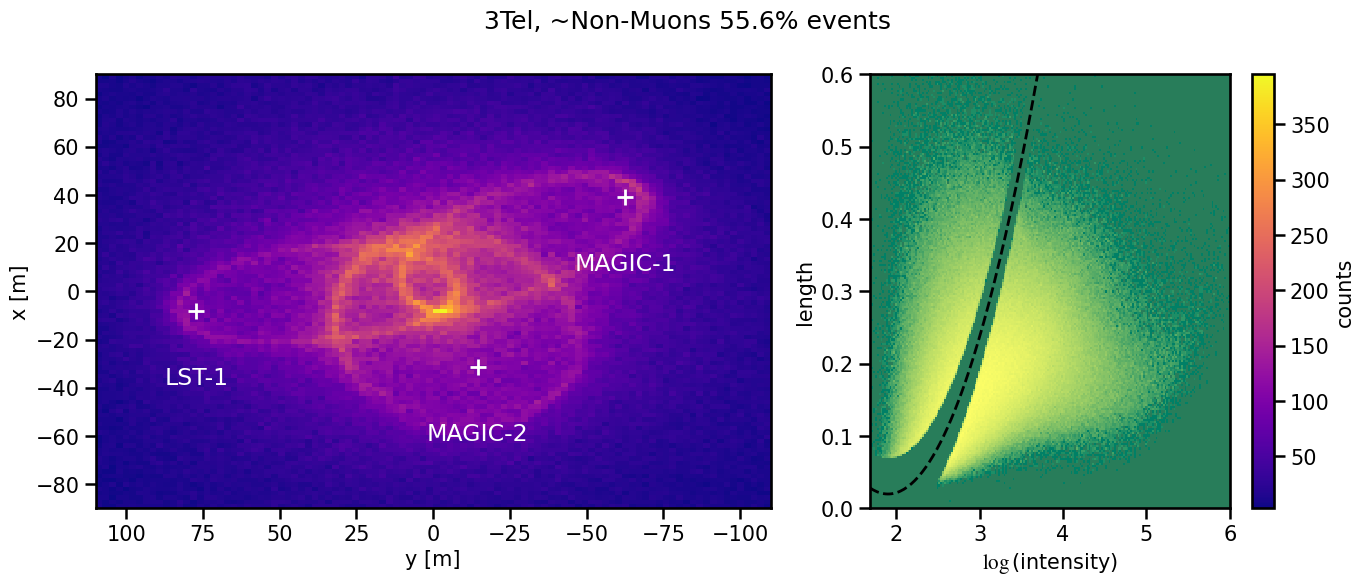

In [22]:
# binning
binsx, binsy = np.linspace(1.68, 6, 200), np.linspace(0, 0.6, 200)
bins = (binsx, binsy)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, ~Muons {len(df_within)/len(c3)*100:.1f}% events')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(df_within['core_y'], df_within['core_x'], bins=100, range=[np.flip(xlim), ylim],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

_, _, _, im = ax2.hist2d(np.log10(df_within['intensity'].to_numpy()), df_within['length'].to_numpy(),
                        bins=bins, cmap='summer', norm=colors.LogNorm())

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('$\log$(intensity)'); ax2.set_ylabel('length')
ax2.plot(binsx, parabola(binsx), c='k', ls='--', lw=2)
ax2.set_facecolor((40/255, 125/255, 90/255))
fig.tight_layout()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6), gridspec_kw={'width_ratios': [1.5, 1]})
fig.suptitle(f'3Tel, ~Non-Muons {len(df_outside)/len(c3)*100:.1f}% events')

for i in range(len(xpos)):
    ax1.plot(xpos[i], ypos[i], '+', color='w', ms=12)
    ax1.text(xpos[i], ypos[i]-28, tel_lab[i], c='w', ha='center', va='center', fontsize=17)

_, _, _, im = ax1.hist2d(df_outside['core_y'], df_outside['core_x'], bins=100, range=[np.flip(xlim), ylim],
                         cmap='plasma')
fig.colorbar(im, label='counts', ax=ax2)

_, _, _, im = ax2.hist2d(np.log10(df_outside['intensity'].to_numpy()), df_outside['length'].to_numpy(),
                        bins=bins, cmap='summer', norm=colors.LogNorm())

ax1.set_xlim(*xlim);         ax1.set_ylim(*ylim)
ax1.set_xlabel('y [m]');     ax1.set_ylabel('x [m]')
ax2.set_xlabel('$\log$(intensity)'); ax2.set_ylabel('length')
ax2.plot(binsx, parabola(binsx), c='k', ls='--', lw=2)
ax2.set_facecolor((40/255, 125/255, 90/255))
fig.tight_layout()
plt.show()